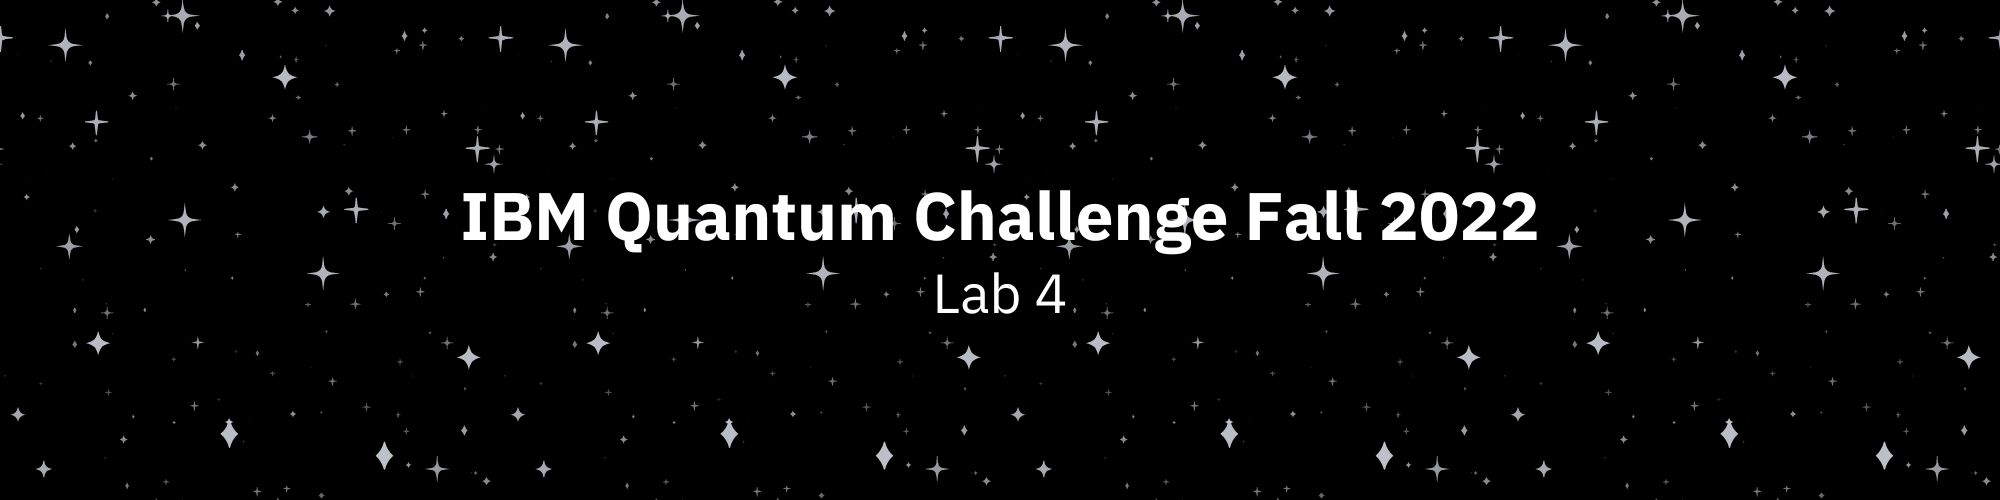

# Quantum Chemistry Challenge - Use Quantum Computers to Explore Interstellar Space!

# Table of Contents
- **[Story](#Story---Chapter-4)**
- **[Introduction: Special Chemistry of Interstellar Molecules](#Introduction:-Special-Chemistry-of-Interstellar-Molecules)**
- **[VQE Syllabi](#VQE-syllabi)**
- **[Part I: Exploring Interstellar $H_3^+$](#Part-I:-Exploring-Interstellar-$H_3^+$)**
    - **[Exercise 1: Defining Molecule declaration for $H_3^+$](#exercise1)**
    - **[Exercise 2: Building up VQE using Estimator](#exercise2)**
    - **[Exercise 3: Creating helper functions](#exercise3)**
    - **[Exercise 4: Computing reaction energy of $H_3^+$](#exercise4)**
- **[Part II: Exploring Interstellar Cyclopropenylidene($C_3H_2$)](#Part-II:-Exploring-Interstellar-Cyclopropenylidene($C_3H_2$))**
    - **[Exercise 5: Exploring the first excited state and computing dipole moment of Cyclopropenylidene](#exercise5)**
- **[Part III: Final Challenge - Exploring the Interstellar Cyclopropenylidene($C_3H_2$) Reaction Chain](#Part-III:-Final-Challenge---Exploring-the-Interstellar-Cyclopropenylidene($C_3H_2$)-Reaction-Chain)**
    - **[Final Challenge: computing the reaction energy of C + C<sub>2</sub>H<sub>2</sub> →C<sub>3</sub>H<sub>2</sub>](##Final-Challenge---Compute-Reaction-energy-of-C-+-C2H2-→C3H2)**

# Story - Chapter 4

With your path clear, you are prepared for your slingshot around the planet. But you want to increase your chances of success as much as possible, and it occurs to you there’s one last thing you can do before you attempt the maneuver.    

You see, one of the magnificent discoveries Earth scientists made while inventing interstellar travel technologies is that certain dense cosmic clouds, especially those containing Hydrogenium ($H_3^+$), Interstellar Cycloproenylidene ($C_3H_2$), or a combination of them, boost starship velocity without expending extra fuel. Like sledding down a steep hill, or sliding a block across an oiled surface.  

If you can find such a cloud within the vicinity of your slingshot path, you can increase your chances of escape. It would be as though a hand of cosmic dust pushes your starship, providing more force to your slingshot.    

But when your systems were broken, certain memory files were corrupted, and you no longer have the molecular properties your scanners require to identify such clouds. You must re-do the calculations. And the more precise your calculations, the more precise your scanners will be!    

Complete these exercises to calculate and analyze the various molecular properties required to calibrate your scanner’s sensors and potentially discover cosmic clouds that will aid in your escape. 

# Introduction: Special Chemistry of Interstellar Molecules

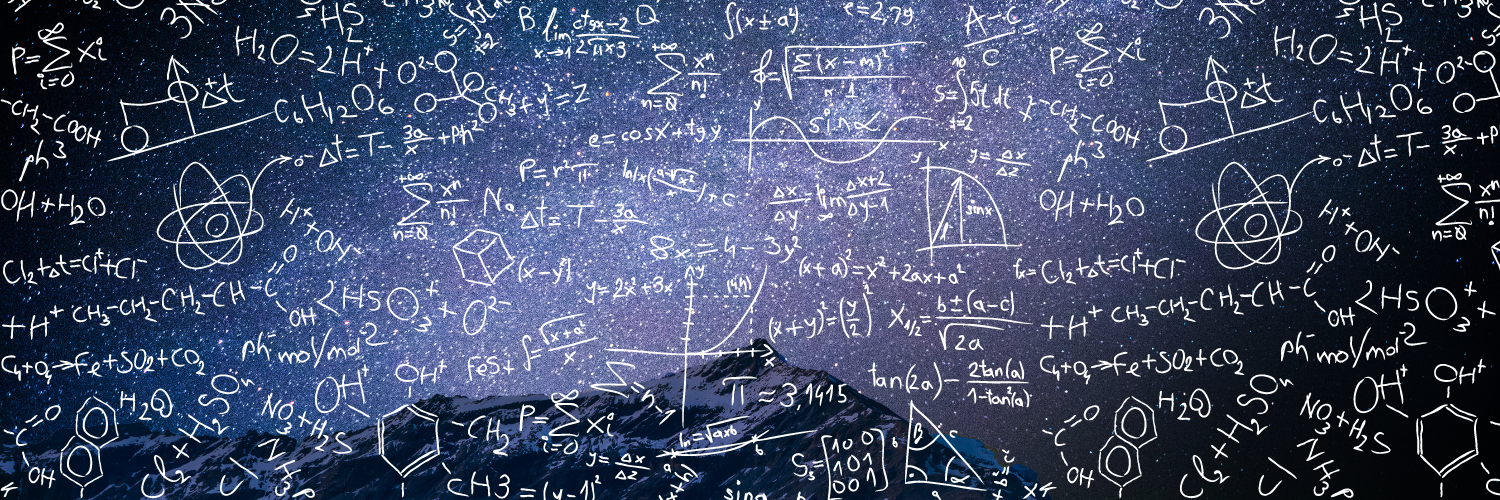

<a id="intro"></a>


Interstellar space is the most remarkable chemical laboratory for many unstable species which are rarely found on Earth. Due to its extreme environment, a large number of chemical processes are very different from how they would behave in the Earth's environment. There are three main types of chemical processes that occur in interstellar and circumstellar regions, these are **[[1]](https://www.astronomy.ohio-state.edu/pogge.1/Ast871/Notes/Molecules.pdf)**:

1. Gas phase processes between atoms, ions and molecules, promoted by photoionization, photodissociation, and cosmic ray ionization
2. Reactions on the surfaces of bare grains, with either prompt or delayed ejection of products into the gas phase
3. Accumulation of molecular ices on the surfaces of dust inside dark clouds, with activation of these ices by cosmic rays or photons and subsequent reactions between the radicals so generated to form species of greater complexity **[[2]](https://pubs.rsc.org/en/content/chapterhtml/2017/bk9781782627760-00001?isbn=978-1-78262-776-0)**

This fascinating interstellar chemistry began in the 1930's with the observation of molecular absorption spectra in distant stars within the galaxy. The species CH, CH+, and CN all have electronic spectra in an accessible wavelength region where the Earth’s atmosphere is still transparent. So far, spectroscopic development including radioastronomy has contributed greatly to unveiling abundant species of molecules in the universe, and also gives us a lot of information on the chemical reaction process that happens there **[[3]](https://www.pnas.org/doi/full/10.1073/pnas.0605352103)**.

In this lab, we will look into a few well-known interstellar chemical reactions and compute a few properties of specific molecules. We will first start off by exploring the formation of interstellar $H_3^+$ ions using $H_2$ and ionized $H_2^+$. Here we will start off by computing the reaction energy by solving for the ground state energy of the participating molecules by building a **Variational Quantum Eigensolver (VQE)** routine. This will be followed by demonstrating how we can compute molecular properties of interest using the ground state energy information obtained by VQE by other approaches dependent on the same. We will be specifically looking and investigating the excited energy absorption spectra and the dipole moment $C_3H_2$ by using a VQD(Variational Quantum Deflation) approach and the Estimator primitive. $C_3H_2$ is a highly reactive class of organic molecules known as carbenes which are only seen in the laboratory due to their reactivity on Earth but are found in significant concentrations in the interstellar medium (ISM) and on Saturn's moon Titan **[[5]](https://pubs.rsc.org/en/content/articlelanding/2003/CP/b303753n)**. Finally, we shall compute the reaction energy of creation of $C_3H_2$ which is our final competition problem to find the best way to have this calculation run on a noisy simulation **[[6]](https://en.wikipedia.org/wiki/Cyclopropenylidene)**. 

For this lab, we will be building up a VQE routine ground up as compared to using the VQE class in the previous problem. Before we begin, we shall briefly go through basics of VQE and basic problem formation using Qiskit Nature for those who are unfamiliar with these concepts.

<a id="vqesyllabi"></a>
# VQE syllabi

<div class="alert alert-block alert-info">
 
<b> References for additional details</b> 

For the Qiskit Nature tutorials that implement this algorithm see **[here](https://qiskit.org/documentation/nature/tutorials/01_electronic_structure.html)**.
For additional information, please refer to Qiskit Github **[first page of github repository](https://github.com/Qiskit/qiskit-nature)** >>> the **[test folder](https://github.com/Qiskit/qiskit-nature/tree/main/test)** with the base code for the use of each functionality.
    

</div>

<a id="part1"></a>
# Part I: Exploring Interstellar $H_3^+$

In the 21st century astrophysics, the study of molecules in interstellar medium is of great interest to uncover information about formation of stars and galaxies in the universe. When Watson, Herbst & Klemperer in 1973 proposed that interstellar molecules may be combining in an ion-molecule type of reaction, it was clear $H_3^+$ ions play an important role in the interstellar environment. **[[7]](https://www.cambridge.org/core/journals/international-journal-of-astrobiology/article/abs/h3-the-initiator-of-interstellar-chemistry/69C0753DDB337E4475416CB6FA3D802D)**

The $H_3^+$ ion, so called "interstellar acid" plays a central role in interstellar chemistry acting as proton donors (acid) through the proton-hop reaction. $H_3$ is produced by the reaction $H_2 + H_2^+ → H_3^+ + H$ in which a proton in $H_2^+$ hops to molecular hydrogen. In interstellar space, cosmic rays are capable of ionizing $H_2$ and are always present. $H_3^+$ is also always ubiquitous as long as $H_2$ is present **[[7]](https://www.cambridge.org/core/journals/international-journal-of-astrobiology/article/abs/h3-the-initiator-of-interstellar-chemistry/69C0753DDB337E4475416CB6FA3D802D)**.

As shown explained in the following paper **[[8]](https://arxiv.org/ftp/arxiv/papers/1707/1707.07926.pdf)** , $H_3^+$ is located at an important point in the ion-molecular chemistry tree and plays a pivotal role in the generation of organic molecules.

We will study the fundamentals of computing the ground state energy of $H_3^+$ ions using Qiskit to get you warmed up with some quantum chemistry tasks. You will be required to determine the reaction energy required to produce $H_3^+$ ions. Cosmic rays that ionize from each of the reacting molecules ground states yield $H_3^+$ ions which we will be looking into for the exercise.

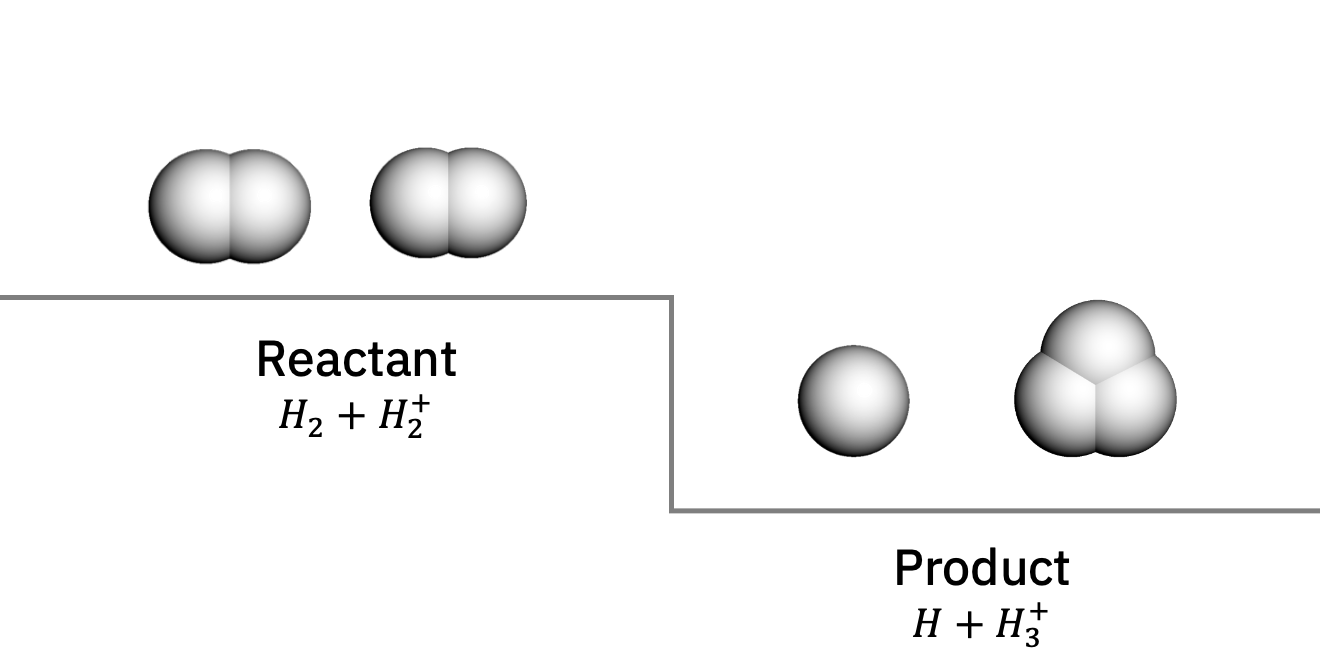

## Importing Libraries 

First, let's start by importing some libraries. We shall be using one of Qiskit's application modules: Qiskit Nature here for loading chemistry drivers and the necessary functions to help us formulate our problem and solve for the molecule we have at hand.

In [1]:
# Import necessary libraries and packages
import math
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from qiskit import Aer, IBMQ, QuantumCircuit
from qiskit.primitives import Estimator
from qiskit.providers.aer import StatevectorSimulator
from qiskit.utils import QuantumInstance

from qiskit.tools.jupyter import *
from qiskit.visualization import *

# Import Qiskit libraries for VQE
from qiskit.algorithms import MinimumEigensolverResult, VQE
from qiskit.algorithms.optimizers import SLSQP, SPSA

# Import Qiskit Nature libraries
from qiskit_nature.algorithms import GroundStateEigensolver, VQEUCCFactory
from qiskit_nature.algorithms.ground_state_solvers.minimum_eigensolver_factories import NumPyMinimumEigensolverFactory
from qiskit_nature.circuit.library import UCC, UCCSD
from qiskit_nature.drivers import Molecule
from qiskit_nature.drivers.second_quantization import ElectronicStructureDriverType, ElectronicStructureMoleculeDriver
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import BravyiKitaevMapper, JordanWignerMapper, ParityMapper
from qiskit_nature.problems.second_quantization.electronic import ElectronicStructureProblem
from qiskit_nature.transformers.second_quantization.electronic import ActiveSpaceTransformer

# Prototype-zne
!pip install prototype-zne --quiet

from qiskit_nature.settings import settings

settings.dict_aux_operators = True

## Building up our Model ground up

### 1. Define molecule geometry and get molecular properties

The first step is to define our molecules by specifying their atomic coordinates, total spin (multiplicity) and charge information. For this, we will first declare molecular structure in cartesian coordinates and set a chemical driver according to its charge and multiplicity.

Molecular geometry can be found by searching research papers **[[9]](https://pubchem.ncbi.nlm.nih.gov/) [[10]](https://webbook.nist.gov/chemistry/form-ser/)**. In this exercise, we will use the properties that originate from this source **[[11]](https://aip.scitation.org/doi/abs/10.1063/1.433585)** with an approximation of the equilateral triangle structure like below picture.

The multiplicity of energy levels is defined as $2S + 1$, where $S$ is the total spin of the molecule. $H_3^+$ has two electrons, and by obeying the **[Aufbau principle](https://en.wikipedia.org/wiki/Aufbau_principle)** and **[Pauli principle](https://en.wikipedia.org/wiki/Pauli_exclusion_principle)**, two electron's total spin are cancelled out due to their configuration ($\uparrow + \downarrow $), leading to a multiplicity of 1.

With this information, let's finish the below part to include the proper molecular structure.

<a id="exercise1"></a>

<div class="alert alert-block alert-success">
<b>Exercise 1:</b> 
    
Complete the below Molecule declaration according to the structure of $H_3^+$. According to the reference, the atomic distance between $H$ is **0.91396** $\text{Å}$ and it is equilateral triangle structure. Our target molecule contains **two electrons** with **charge +1**. To grade your answer, <b>do not</b> change the basis.</div>

<div class="alert alert-block alert-info">
    <b> Note from Sensei: Spin and Multiplicity of molecules </b>

We need to specify which electronic state to compute. In quantum chemistry calculations, $S$ corresponds to the spin of the unpaired electrons. The spin of electrons is $\frac{1}{2}$, thus the total spin can be described as follows, <br>
$S = \frac{1}{2} \times \mathrm{number\ of\ unpaired\ electrons}$. <br>
The spin multiplicity is $2S + 1$, which is "$\mathrm{number\ of\ unpaired\ electrons}+1$".
    
</div>

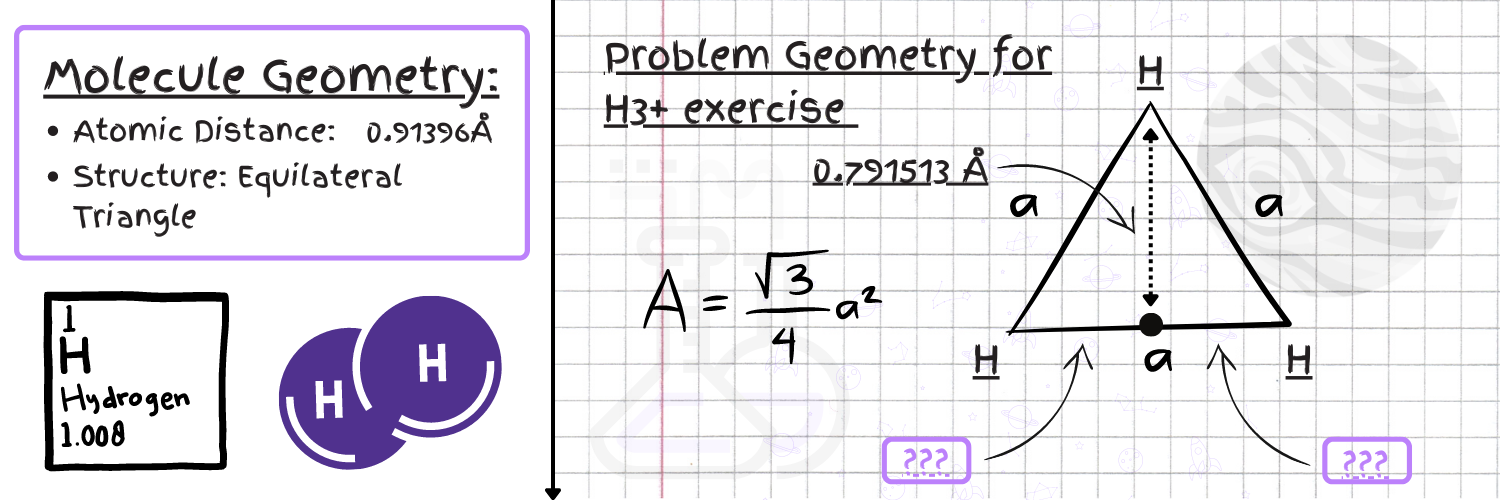

In [17]:
#### Fill in the values below and complete the function to define the Molecule ####

# Coordinates are given in Angstrom

#H3+
value = 0.91396/2 #((np.sqrt(3)/4)*(0.91396**2))/2

hydrogen_t = [["H", [value, 0.0, 0.0]], # ----------- Enter your code here
              ["H", [-value, 0.0, 0.0]], # ----------- Enter your code here
              ["H", [0.0, 0.791513, 0.0]]]
                  
h3p = Molecule( # Fill up the function below
    geometry= hydrogen_t, # ----------- Enter your code here
    multiplicity=1, # 2𝑆+1 , which is " number of unpaired electrons+1 " ----------- Enter your code here
    charge=1, # ----------- Enter your code here
)

driver = ElectronicStructureMoleculeDriver(h3p, basis="ccpvdz", driver_type=ElectronicStructureDriverType.PYSCF) 

properties = driver.run()

In [18]:
## Grade and submit your solution
from qc_grader.challenges.fall_2022 import grade_lab4_ex1

grade_lab4_ex1(h3p)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


The Qiskit Nature driver gives us some properties of the molecule (see also: **[The Property Framework](https://qiskit.org/documentation/nature/tutorials/08_property_framework.html)**), let's check some out now!

In [19]:
num_alpha_electrons = properties.get_property('ParticleNumber').num_alpha
num_beta_electrons = properties.get_property('ParticleNumber').num_beta
num_spin_orbitals = int(properties.get_property('ParticleNumber').num_spin_orbitals)

nuclear_rep_energy = properties.get_property('ElectronicEnergy').nuclear_repulsion_energy
print("number of alpha electrons: " , num_alpha_electrons)
print("number of beta electrons: " , num_beta_electrons)
print("number of spin orbitals: " , num_spin_orbitals)
print("nuclear repulsion energy: " , nuclear_rep_energy)

number of alpha electrons:  1
number of beta electrons:  1
number of spin orbitals:  30
nuclear repulsion energy:  1.736981060004552


### 2. Electronic Structure Problem and Active Space Transformer


The next step is to select our active space which will describe what molecular orbitals will be simulated with VQE and treat the rest with classical methods. The more orbitals we include in our active space, the more computationally expensive our quantum circuit will be. As such, the goal is to construct the most accurate active space with as fewest orbitals as possible. 

In Qiskit Nature, we use  `ActiveSpaceTransformer` to specify how many electrons and molecular orbitals we would like to have in our active space, as well as which of those particular orbitals we would like to consider. 
After that, you can then create an `ElectronicStructureProblem` that produces a list of fermionic operators before mapping them to qubits (Pauli strings).

<div class="alert alert-block alert-info">
    <b> Note from Sensei: Active Space </b>

    
As the problem size increases, the computational cost (number of qubits (which corresponds to the number of orbitals is used) and the circuit depth (which corresponds to the number of electronic excitations considered)) increases rapidly. The active space approach is a well known approach to reduce the computational cost. In many chemistry problems, the orbitals occupied with electrons high in energy and the unoccupied orbitals with low energy play an important role. So, rather than treating all orbitals and electrons with the same accuracy, treating those important electrons and orbitals with high accuracy is a good approximation in general. Therefore, we can select the important orbitals and electrons as our active space and solve the problem with low cost while maintaining the accuracy of the calculation.
    
</div>

In [20]:
# Check the occupation of the spin orbitals
PN_property = properties.get_property("ParticleNumber")

# Define the active space around the Fermi level 
# (selected automatically around the HOMO and LUMO, ordered by energy)
transformer = ActiveSpaceTransformer(
    num_electrons=2, # Number of electrons in our active space
    num_molecular_orbitals=3, # Number of orbitals in our active space
)

# Now you can get the reduced electronic structure problem
problem_reduced = ElectronicStructureProblem(driver, transformers=[transformer]) 

# The second quantized Hamiltonian of the reduce problem
second_q_ops_reduced = problem_reduced.second_q_ops()

### 3. Fermion-Qubit Mapping 

Because electrons are fermions, the electronic systems are described by Hamiltonians consisting of fermionic operators expressed in second quantization. Since quantum computers are made up of qubits, we have to transform such fermionic Hamiltonians into the qubit operators. There are different types of mappers to transform fermionic operators to qubits operators. You can try different mapping options, but we will stick to `ParityMapper`, where we will be exploiting problem symmetries and applying two-qubit reduction to reduce the problem size. Feel free to to try out different mappers and experiment if you wish, but for the purposes of the challenge grading, we will be using `ParityMapper`.

In [21]:
# Setup the mapper and qubit converter
mapper_type = 'ParityMapper'

if mapper_type == 'ParityMapper':
    mapper = ParityMapper()
elif mapper_type == 'JordanWignerMapper':
    mapper = JordanWignerMapper()
elif mapper_type == 'BravyiKitaevMapper':
    mapper = BravyiKitaevMapper()


converter = QubitConverter(mapper)

qubit_op = converter.convert(second_q_ops_reduced["ElectronicEnergy"])
print(qubit_op)

-2.3705782023199067 * IIIIII
+ 0.34922961804567315 * IIIIIZ
- 1.724684231389252e-08 * IIIIZX
+ 1.724684231389252e-08 * IIIIIX
+ 0.04107515475323966 * IIIIZZ
+ 0.04107508575378117 * IIIZZI
+ 0.34922961804567304 * IIZZII
- 1.724684231345884e-08 * IZXZII
+ 1.724684231345884e-08 * IIXIII
+ 0.041075154753239716 * IZZIII
+ 0.04107508575378115 * ZZIIII
+ 0.09263375051327312 * IIIIZI
+ 0.09263374411183452 * IIIZZZ
+ 0.17034249149501576 * IIZZIZ
+ 0.018925061845451077 * IZXZZX
- 0.018925061845451077 * IIXIZX
- 0.018925061845451077 * IZXZIX
+ 0.018925061845451077 * IIXIIX
+ 0.018925050277470042 * ZXXIXX
+ 0.018925050277470042 * IYYZXX
+ 0.018925050277470042 * ZXXZYY
+ 0.018925050277470042 * IYYIYY
+ 0.1115588123587242 * IZZIIZ
+ 0.0063335393221771 * IZZIZX
- 0.0063335393221771 * IZZIIX
- 0.006333532495286795 * ZXZZXX
+ 0.006333532495286795 * IXIZXX
- 0.006333532495286795 * ZXZIYY
+ 0.006333532495286795 * IXIIYY
+ 0.11155879438930455 * ZZIIIZ
- 0.006333537574596988 * ZZIIZX
+ 0.006333537574596988

### Apply reduction

We can reduce system size by applying various methods. Here, we will apply **[two qubit reduction](https://qiskit.org/documentation/stubs/qiskit.opflow.converters.TwoQubitReduction.html)**. The two qubit reduction converter eliminates the central and last qubit in a list of Paulis that have diagonal operators (Z, I) in those positions. This is a nice method that can be used in chemistry problems to reduce computational resources. In this particular example, this method can be used to taper two qubits in parity and binary-tree mapped fermionic Hamiltonians when the spin orbitals are ordered in two spin sectors (block spin order), according to the number of particles in the system.

In [22]:
# Set the mapper to qubits
parity_mapper = ParityMapper() # This is the example of parity mapping

# Set the qubit converter with two qubit reduction to reduce the computational cost 
parity_converter = QubitConverter(parity_mapper, two_qubit_reduction=True)    

# Compute the Hamitonian in qubit form
qubit_op_parity = parity_converter.convert(second_q_ops_reduced.get('ElectronicEnergy'), num_particles=problem_reduced.num_particles)

print(qubit_op_parity)

-2.370578202319906 * IIII
+ 0.2715275628536513 * IIIZ
- 1.7246842313892515e-08 * IIZX
+ 1.7246842313892515e-08 * IIIX
- 0.05155858935859483 * IIZZ
+ 0.051558664759491925 * IIZI
- 0.2715275628536512 * IZII
+ 1.7246842313458834e-08 * ZXII
+ 1.7246842313458834e-08 * IXII
- 0.051558589358594774 * ZZII
- 0.05155866475949194 * ZIII
- 0.1703424914950157 * IZIZ
- 0.01892506184545107 * ZXZX
- 0.01892506184545107 * IXZX
+ 0.01892506184545107 * ZXIX
+ 0.01892506184545107 * IXIX
+ 0.018925050277470035 * XXXX
- 0.018925050277470035 * YYXX
- 0.018925050277470035 * XXYY
+ 0.018925050277470035 * YYYY
+ 0.11155881235872415 * ZZIZ
+ 0.0063335393221770975 * ZZZX
- 0.0063335393221770975 * ZZIX
+ 0.006333532495286793 * XZXX
- 0.006333532495286793 * XIXX
- 0.006333532495286793 * XZYY
+ 0.006333532495286793 * XIYY
+ 0.11155879438930451 * ZIIZ
- 0.006333537574596986 * ZIZX
+ 0.006333537574596986 * ZIIX
- 0.11155881235872415 * IZZZ
- 0.006333539322177099 * ZXZZ
- 0.006333539322177099 * IXZZ
- 0.006333532495286

### 4. Compute the Real Solution for Reference Plotting

Before we start to compute the ground state using Qiskit Runtime, let's compute a reference ground state energy by using `GroundStateEigensolver`. 

In [23]:
vqe_factory = VQEUCCFactory( # This is an example of UCC"SD" ansatz
    quantum_instance=Aer.get_backend("aer_simulator_statevector"),
    optimizer=SLSQP(),
    ansatz=UCC(excitations='sd')
) 

from qiskit.algorithms import NumPyMinimumEigensolver

numpy_solver = NumPyMinimumEigensolver()

solver = GroundStateEigensolver(parity_converter, vqe_factory)  # Define Numpy
real_solution_t = solver.solve(problem_reduced).total_energies[0]    
print('Reference energy : ', real_solution_t)

Reference energy :  (-1.3014603031212135+0j)


## Build VQE Routine on Estimator

To find the ground state one of the most popular approaches around is the **Variational Quantum Eigensolver (VQE) algorithm.** The VQE algorithm works by exchanging information between a classical and a quantum computer as depicted in the following figure.

In the previous labs we leveraged prebuilt functions in Terra to run our VQE instances. Here, we shall try to build one from the ground up using the Estimator primitive. We shall also pass in a `noise_model` to simulate a noisy simulation routine here later in the notebook.

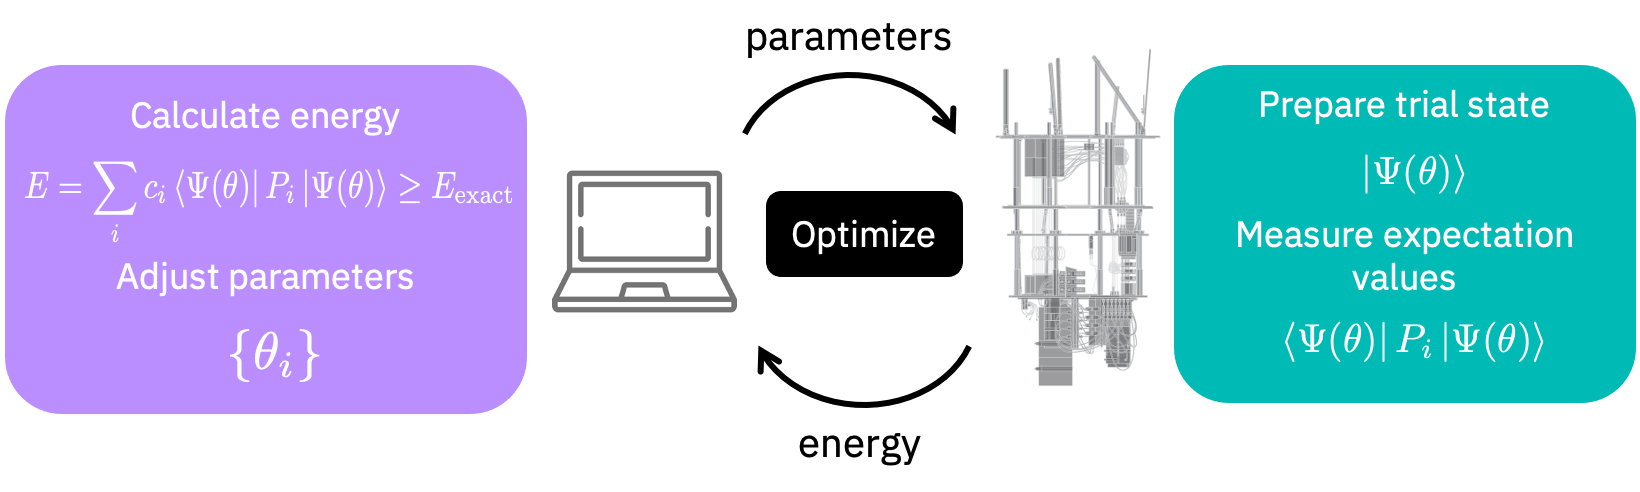

Image: [Qiskit Nature Docs: Ground state solver tutorial](https://qiskit.org/documentation/nature/tutorials/03_ground_state_solvers.html)

We shall build up on a VQE routine using `Estimator` to measure expectation values of the prepared states and use a classical optimizer to readjust our parameters again for the next iteration.

### Building a Variational Quantum Eigensolver using Estimator 

To build up a routine for VQE using estimator, let's look at our previous image and leverage the same intuition. 

For our variational model or `ansatz` which will serve as our model circuit for evaluation and optimization of parameters as shown in the Qiskit Nature docs tutorial image above, we shall use a chemistry specific `UCCSD` type of ansatz for our problem here. 

As mentioned in the Qiskit nature **[tutorial](https://qiskit.org/documentation/nature/tutorials/03_ground_state_solvers.html)**: the Unitary Coupled Cluster **[`UCC`](https://qiskit.org/documentation/nature/stubs/qiskit_nature.circuit.library.UCC.html)** ansatz (see **[[12]](https://arxiv.org/abs/1805.04340)** as an example) is a chemistry standard widely utilized across. Here we shall be specifying single and double excitation states. However, the excitation type (`'s'`,`'d'`,`'sd'`) as well as other parameters can be selected.


In [24]:
# Define our 'ansatz' for the problem
ansatz = UCC(
    qubit_converter=parity_converter,
    num_particles=problem_reduced.num_particles, 
    num_spin_orbitals=problem_reduced.num_spin_orbitals,
    excitations='sd'
)

Next, we will define how we shall set our routine with the `Estimator`. Remember, the `Estimator` will return the estimated expectation values of quantum circuits and observables passed to it. The **circuit** to pass here will be our `ansatz`, the **observables** will be the `qubit_op_parity` hamiltonian we just made and the **parameter_values** will be the values processed by the classical optimizer passed here as `x`. For our example here, we shall be using the Simultaneous perturbation stochastic approximation (`SPSA`) optimizer for our routine.

This will be done iteratively and here we shall define a routine as shown in the image below: 

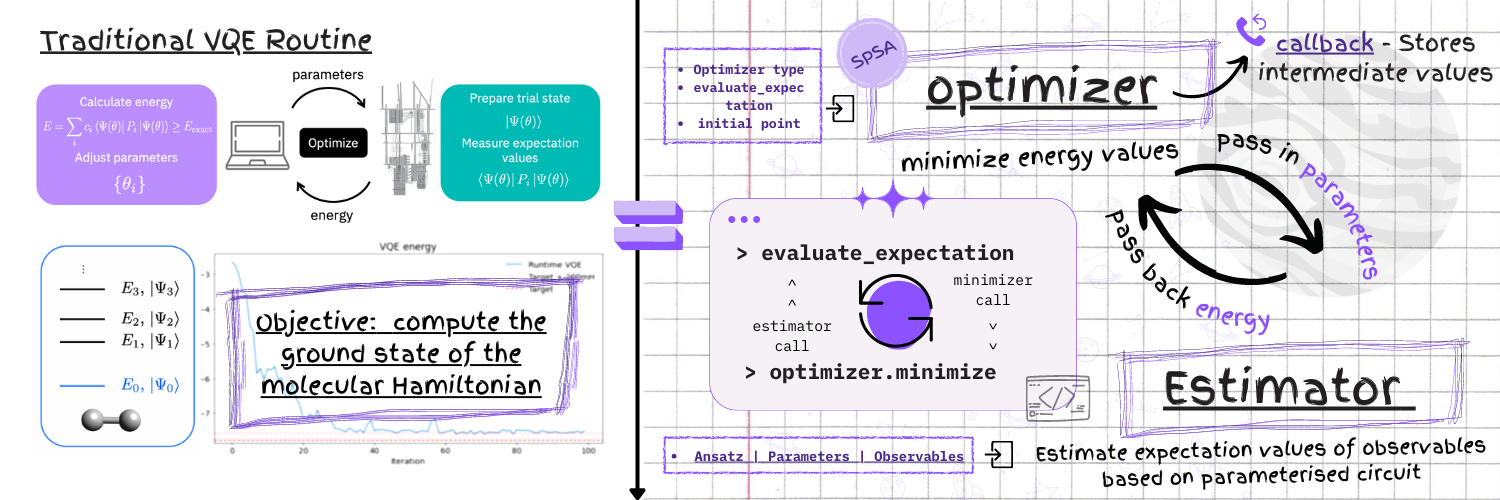

The `optimizer` we define will be used to minimize a scalar function. Here we should define a function such that we return the computed expectation value result to be minimized. We shall define `evaluate_expectation` function to calculate the same using the `Estimator`. This will be the function passed to our optimizer to solve for and generate a new set of parameters to be evaluated again.

For the purpose of visualizing the result and getting a view on the internal states of the optimization run, we shall also define a `callback` function which shall append the convergence value per run and store it in a list to be visualized later.

In [25]:
from qiskit.primitives import Estimator, BackendEstimator

## A short note on the Estimator Primitive

We have been using the Qiskit Runtime version of `Estimator` until now. For the purposes of this exercise, we shall use a localized version of the `Estimator` which resides in Qiskit Terra.

### Specification
Formally speaking, the _Estimator_ primitive is a standardized specification for calculating and interpreting expectation values for different combinations of quantum states (i.e. circuits) and operators. This means that there is no single `Estimator` class to solve this task, but rather a family of them; each of which performing the same (internal) calculation on a slightly different way, while exposing a common _application programming interface_ (API) to the users.


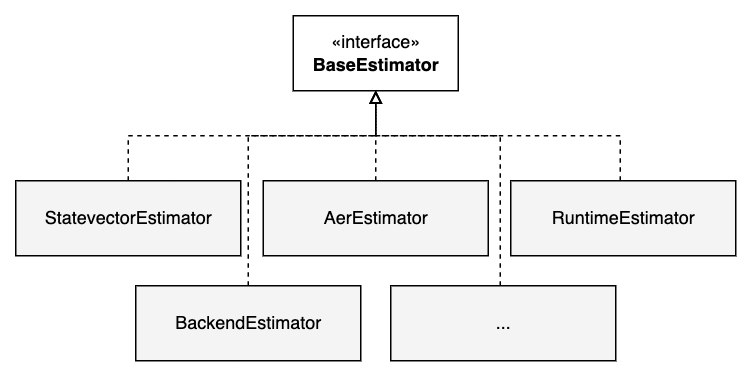

Following now, we shall go forward with Qiskit's native Terra implementation of `Estimator` and `BackendEstimator` with Qiskit's native simulators. You can substitute this with the Qiskit Runtime Estimator by following the same routine as before if you wish. Here is a tutorial that will help you **[get started with the Estimator class residing in Qiskit Terra](https://qiskit.org/documentation/apidoc/primitives.html)**

<a id="exercise2"></a>

<div class="alert alert-block alert-success">
<b>Exercise 2:</b> 
    
Complete the cell below for building up our VQE routine. Define the `Estimator` primitive object and define the `estimator.run` call for the `evaluate_expectation` function. 
Fill the optimizer call using the `SPSA` optimizer with `maxiter=50` and pass the callback function for the intermediate values to be stored for plotting. Finally, store the result by calling the optimizer.minimize call to complete the routine.
    
For successful grading, use a `UCCSD ansatz` and `maxiter=50` for your optimizer and do not modify any of the seed values. </div>

### Calculate the ground state of $H_3^+$

In [52]:
%%time
from qiskit.utils import algorithm_globals
algorithm_globals.random_seed = 1024

# Define convergence list
convergence = []

# Keep track of jobs (Do-not-modify)
job_list = []

# Initialize estimator object
estimator = Estimator() # Enter your code here

# Define evaluate_expectation function
def evaluate_expectation(x):
    x = list(x)
    #print(x)
    # Define estimator run parameters
    #### enter your code below ####
    job = estimator.run(ansatz, qubit_op_parity, x)# ----------- Enter your code here
    #print(job)
    results = job.result().values[0]
    job_list.append(job)
    
    # Pass results back to callback function
    return np.real(results)

# Call back function
def callback(x,fx,ax,tx,nx):
    # Callback function to get a view on internal states and statistics of the optimizer for visualization
    convergence.append(evaluate_expectation(fx))

np.random.seed(10)

# Define initial point. We shall define a random point here based on the number of parameters in our ansatz
initial_point = np.random.random(ansatz.num_parameters)
#print(initial_point)
#### enter your code below ####
# Define optimizer and pass callback function
optimizer = SPSA(maxiter=50,callback=callback)# ----------- Enter your code here

# Define minimize function
#result =  optimizer.optimize(ansatz.num_parameters, evaluate_expectation, initial_point=initial_point)# ----------- Enter your code here
result =  optimizer.minimize(evaluate_expectation,initial_point)

CPU times: user 19.3 s, sys: 103 ms, total: 19.4 s
Wall time: 19.5 s


In [70]:
#result.total_energies[0].real
problem_reduced.interpret(result).total_energies[0].real

Traceback (most recent call last):
  Input In [70] in <cell line: 2>
    problem_reduced.interpret(result).total_energies[0].real
  File /opt/conda/lib/python3.8/site-packages/qiskit_nature/problems/second_quantization/electronic/electronic_structure_problem.py:174 in interpret
    result.combine(eigenstate_result)
  File /opt/conda/lib/python3.8/site-packages/qiskit_nature/results/eigenstate_result.py:166 in combine
    raise TypeError("Argument result expected.")
TypeError: Argument result expected.

Use %tb to get the full traceback.


In the cell below, we will interpret our optimizer eigenstateresult in the context of our problem_reduced transformation for the molecule we defined above:

In [54]:
Energy_H_t = []
for i in range(len(convergence)):
    sol = MinimumEigensolverResult()
    sol.eigenvalue = convergence[i]
    sol = problem_reduced.interpret(sol).total_energies[0]
    Energy_H_t.append(sol)
print("Computed Energy:", Energy_H_t[-1])

Computed Energy: (-1.29738371458139+0j)


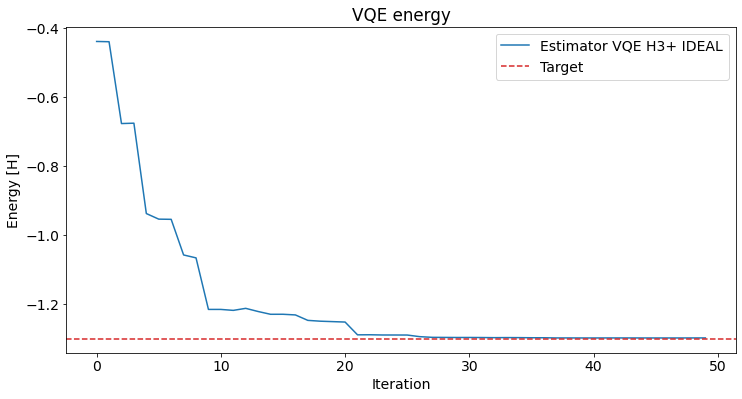

In [55]:
# The following plot compares the two Estimators - with and without noise

plt.rcParams["font.size"] = 14

# plot loss and reference value
plt.figure(figsize=(12, 6), facecolor='white')
plt.plot(Energy_H_t, label="Estimator VQE H3+ IDEAL")
plt.axhline(y=real_solution_t.real, color="tab:red", ls="--", label="Target")

plt.legend(loc="best")
plt.xlabel("Iteration")
plt.ylabel("Energy [H]")
plt.title("VQE energy")
plt.show()

In [56]:
## Grade and submit your solution
from qc_grader.challenges.fall_2022 import grade_lab4_ex2

grade_lab4_ex2(result, Energy_H_t)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## Building helper functions
Before proceeding further with more VQE problems, it would be convenient to make a reusable custom function that we can call to get problem related items and VQE instances. As an exercise since you built the routine previously, rebuild the functions below to have these helper functions available to be called when needed!

<a id="exercise3"></a>

<div class="alert alert-block alert-success">
<b>Exercise 3:</b> 
    
Complete the **two custom functions** below which can be later utilized conveniently for running more molecular simulations.
    
>- The **first function** is the `construct_problem` function which will take in a list of 
    - `geometry` coordinates, `charge`,`multiplicity` for the `Molecule` object, 
    - `basis` for `ElectronicStructureMoleculeDriver` and 
    - `num_molecular_orbitals` for the `ActiveSpaceTransformer` call. <br>
    
 **The first function will return** the `ansatz` circuit, `qubit_op_parity` Hamiltonian, `real_solution` converged using the StatevectorSimulator, `problem_reduced` which has the reduced `ElectronicStructureProblem` as done above

    
>- The **second function** is the `custom_vqe` function which will take in:
    - An `estimator` object which can be any estimator derivation as long as it implements the `BaseEstimator` class
    - `ansatz` circuit to be evaluated,
    - `ops` observables to be estimated, 
    - `problem_reduced` which has the reduced `ElectronicStructureProblem` for interpreting results
    - `optimizer` if required. Default will be set to `SPSA`
 
**The second function will return** the `vqe_interpret` list of interpreted converged values by the optimizer, `job_list` list of stored jobs
    
Please do not modify the seed values for the grader runs to be successful.
</div>

### 1. Helper Function for constructing problem

In [57]:
def construct_problem(geometry, charge, multiplicity, basis, num_electrons, num_molecular_orbitals):

    molecule = Molecule(geometry=geometry,
                            charge=charge, 
                            multiplicity=multiplicity) 
    driver = ElectronicStructureMoleculeDriver(molecule, basis=basis, driver_type=ElectronicStructureDriverType.PYSCF) 

    # Run the preliminary quantum chemistry calculation
    properties = driver.run()

    # Set the active space
    active_space_trafo = ActiveSpaceTransformer(num_electrons=num_electrons,
                                        num_molecular_orbitals=num_molecular_orbitals) 


    # Now you can get the reduced electronic structure problem
    problem_reduced = ElectronicStructureProblem(driver, transformers=[active_space_trafo])# ----------- Enter your code here

    # The second quantized Hamiltonian of the reduce problem
    second_q_ops_reduced = problem_reduced.second_q_ops()

    '''
    # Set the mapper to qubits
    parity_mapper = ParityMapper() # This is the example of parity mapping

    # Set the qubit converter with two qubit reduction to reduce the computational cost 
    parity_converter = QubitConverter(parity_mapper, two_qubit_reduction=True)    

    # Compute the Hamitonian in qubit form
    qubit_op_parity = parity_converter.convert(second_q_ops_reduced.get('ElectronicEnergy'), num_particles=problem_reduced.num_particles)
    '''
    
    # Set the mapper to qubits
    parity_mapper = ParityMapper() # This is the example of parity mapping

    # Set the qubit converter with two qubit reduction to reduce the computational cost 
    parity_converter = QubitConverter(parity_mapper, two_qubit_reduction=True)# ----------- Enter your code here    

    # Compute the Hamitonian in qubit form
    qubit_op_parity = parity_converter.convert(second_q_ops_reduced.get('ElectronicEnergy'), num_particles=problem_reduced.num_particles)
   
    # Get reference solution
    vqe_factory = VQEUCCFactory(quantum_instance=StatevectorSimulator(),optimizer=SLSQP(),ansatz=UCC(excitations='sd')) 
    solver = GroundStateEigensolver(parity_converter, vqe_factory)    
    real_solution = solver.solve(problem_reduced).total_energies[0]    
    
    ansatz=vqe_factory.ansatz
    
    return ansatz, qubit_op_parity, real_solution, problem_reduced

### 2. Helper function for Running VQE

In [61]:
def custom_vqe(estimator, ansatz, ops, problem_reduced, optimizer = None, initial_point=None):

    # Define convergence list
    convergence = []

    # Keep track of jobs (Do-not-modify)
    job_list = []

    # Define evaluate_expectation function
    def evaluate_expectation(x):
        x = list(x)

        # Define estimator run parameters
        job = estimator.run(ansatz, ops, x)# ----------- Enter your code here
        results = job.result().values[0]
        job_list.append(job)

        # Pass results back to callback function
        return np.real(results)

    # Call back function
    def callback(x,fx,ax,tx,nx):
        # Callback function to get a view on internal states and statistics of the optimizer for visualization
        convergence.append(evaluate_expectation(fx))

    np.random.seed(10)

    # Define initial point. We shall define a random point here based on the number of parameters in our ansatz
    if initial_point is None:
        initial_point = np.random.random(ansatz.num_parameters)

    # Define optimizer and pass callback function
    if optimizer == None:
        optimizer = SPSA(maxiter=50, callback=callback)

    # Define minimize function
    result = optimizer.minimize(evaluate_expectation,initial_point) # ----------- Enter your code here

    vqe_interpret = []
    for i in range(len(convergence)):
        sol = MinimumEigensolverResult()
        sol.eigenvalue = convergence[i]
        sol = problem_reduced.interpret(sol).total_energies[0]
        vqe_interpret.append(sol)

    return vqe_interpret, job_list, result

### 3. Custom Function to Plot Graphs
Creating a helper function to create plots for future use.

In [59]:
import matplotlib.pyplot as plt

def plot_graph(energy, real_solution, molecule, color="tab:blue"):
    
    plt.rcParams["font.size"] = 14

    # plot loss and reference value
    plt.figure(figsize=(12, 6), facecolor='white')
    plt.plot(energy, label="Estimator VQE {}".format(molecule),color = color)
    plt.axhline(y=real_solution.real, color="tab:red", ls="--", label="Target")

    plt.legend(loc="best")
    plt.xlabel("Iteration")
    plt.ylabel("Energy [H]")
    plt.title("VQE energy")
    plt.show()

In [62]:
## Grade and submit your solution
from qc_grader.challenges.fall_2022 import grade_lab4_ex3

grade_lab4_ex3(construct_problem, custom_vqe)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Now that we have all of the ingredients ready to use, a very brief note on why computing the ground state energy of a reaction is useful for us: Having this information can give us various insights into properties that are of interest indirectly. You can explore the kinetics of a given reaction through the ground state energies of reactants/products or transition states, derive other molecular property insights like dipoles, polarizabilities, forces, calculate excitation energies and much more.


For example, let's now compute for the reaction below; given the reactants and products, find out the transition energy needed to make a $H_3^+$ ion. 

## Reaction Energy of H<sub>2</sub> + H<sub>2</sub><sup>+</sup> &rarr; H<sub>3</sub><sup>+</sup> + H



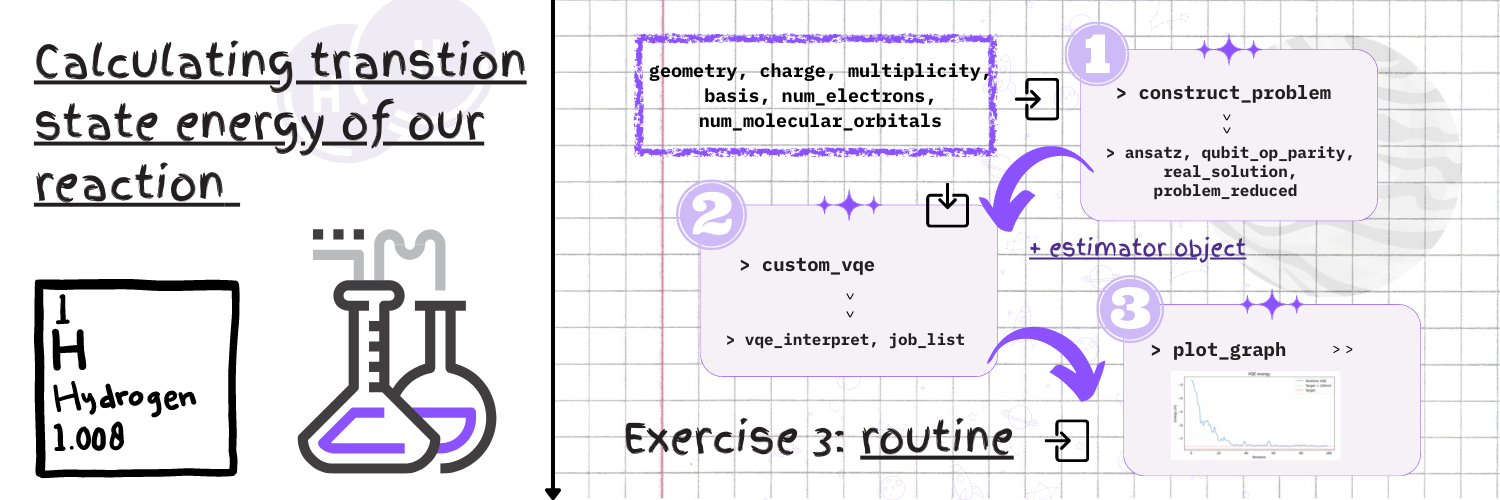

### 1. Compute the Ground State Energy of Each Ingredient

#### Define Geometry

Here we shall define the geometry of each of the molecules mentioned above.

In [63]:
# Constructing H2
hydrogen_m = [["H", [0.3714,    0.0,    0.0]], 
              ["H",[ -0.3714,    0.0,   0.0]]] 

# Constructing H2+
hydrogen_c = [["H", [0.546211,    0.0,    0.0]], 
              ["H",[ -0.546211,  0.0,   0.0]]]

# Constructing H
hydrogen_a = [["H",[0.0,0.0,0.0]]] 

### Construct Problem

We shall use our helper functions to construct the problem and run our simulation to get the ground state of each of the reactants/products.

#### $H_2$ - VQE Run

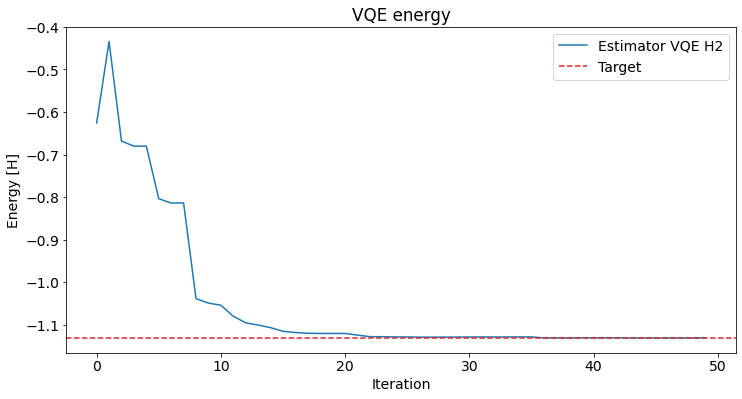

In [64]:
algorithm_globals.random_seed = 1024
# For H2
ansatz_m, ops_m, real_solution_m, problem_reduced_m = construct_problem(geometry=hydrogen_m, charge=0, multiplicity=1, basis="ccpvdz", num_electrons=2, num_molecular_orbitals=2)

# Estimator VQE for H2
Energy_H_m,_,jobs = custom_vqe(estimator=Estimator(), ansatz=ansatz_m, ops=ops_m,problem_reduced=problem_reduced_m)

# Plot Graph H2
plot_graph(Energy_H_m, real_solution_m, "H2")


#### $H_2^+$ - VQE Run

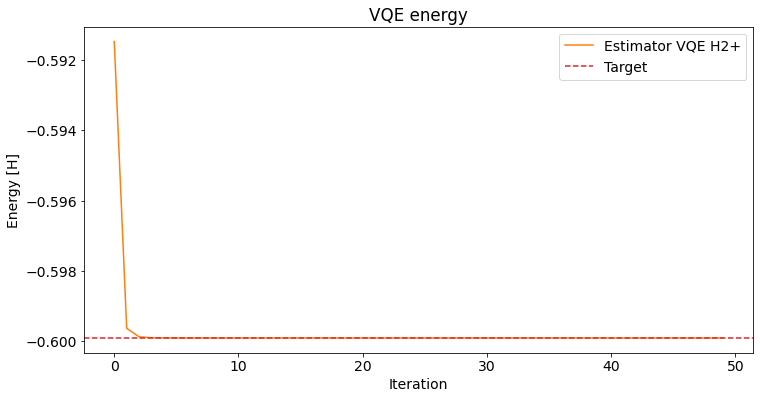

In [65]:
algorithm_globals.random_seed = 1024
# For H2+
ansatz_c, ops_c, real_solution_c, problem_reduced_c = construct_problem(geometry=hydrogen_c, charge=1, multiplicity=2, basis="ccpvdz", num_electrons=(1,0), num_molecular_orbitals=2)

# Estimator VQE for H2+
Energy_H_c,_,jobs = custom_vqe(estimator=Estimator(), ansatz=ansatz_c, ops=ops_c,problem_reduced=problem_reduced_c)

# Plot Graph H2+
plot_graph(Energy_H_c, real_solution_c, "H2+",color = "tab:orange")

#### $H_3^+$ - VQE Run

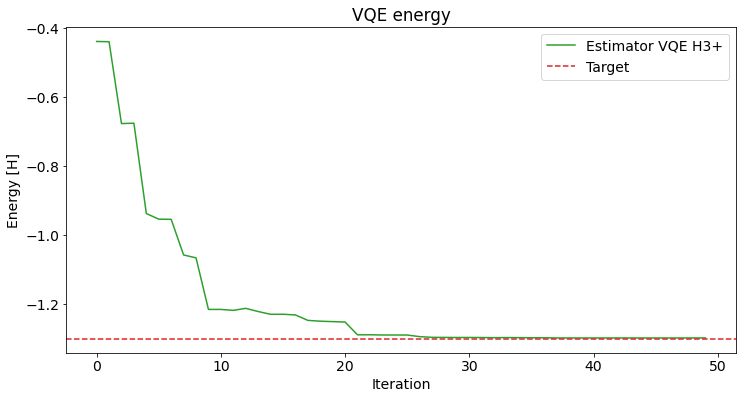

In [66]:
# Plot Graph H3+
plot_graph(Energy_H_t, real_solution_t, "H3+",color = "tab:green")

#### H - VQE Run

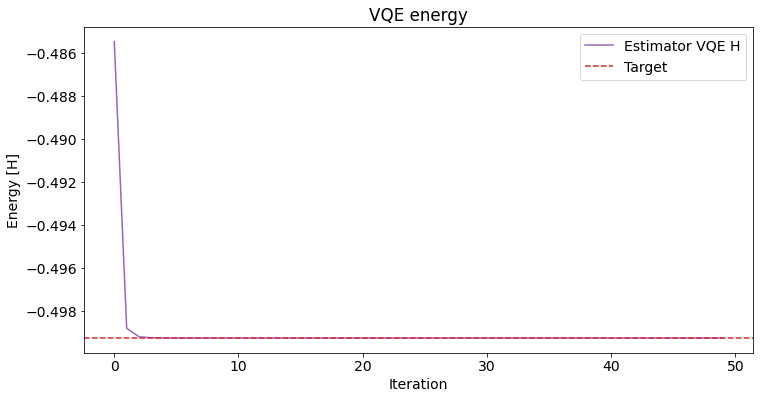

In [67]:
algorithm_globals.random_seed = 1024
# For H
ansatz_a, ops_a, real_solution_a, problem_reduced_a = construct_problem(geometry=hydrogen_a, charge=0, multiplicity=2, basis="ccpvdz", num_electrons=(1,0), num_molecular_orbitals=2)

# Estimator VQE for H
Energy_H_a,_,jobs = custom_vqe(estimator=Estimator(), ansatz=ansatz_a, ops=ops_a, problem_reduced=problem_reduced_a)


# Plot Graph H
plot_graph(Energy_H_a, real_solution_a, "H",color = "tab:purple")

<a id="exercise4"></a>

<div class="alert alert-block alert-success">
<b>Exercise 4:</b> 
    
Compute the reaction energy by running the above VQE routines (in units of eV). Please note that our VQE result is in Hartree units hence you may need to convert it to get a result in eV. </div>

In [78]:

#### enter your code below ####
# Please note the reaction energy should be in eV and not in Hartree units for successful grading.
print(f'Energy_H_m:{Energy_H_m[-1].real}')
print(f'Energy_H_c:{Energy_H_c[-1].real}')
print(f'Energy_H_c:{Energy_H_t[-1].real}')
print(f'Energy_H_a:{Energy_H_a[-1].real}')

react_vqe_ev = Energy_H_t[-1].real + Energy_H_a[-1].real

#### enter your code below ####


print("Reaction energy VQE estimator eV", react_vqe_ev ,"\n")

Energy_H_m:-1.1311826662830757
Energy_H_c:-0.5999067753423131
Energy_H_c:-1.29738371458139
Energy_H_a:-0.49927840341957874
Reaction energy VQE estimator eV -1.7966621180009688 



In [79]:
## Grade and submit your solution
from qc_grader.challenges.fall_2022 import grade_lab4_ex4

grade_lab4_ex4(react_vqe_ev) # Hint: Answer is in eV! :)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


The reference reaction energy of the formation of $H_3^+$ is -1.7eV **[[12]](https://www.pnas.org/doi/10.1073/pnas.0601242103)** which matches well with our calculated result!

The above reaction is extremely efficient and leads to $H_3^+$ being the dominant ion in hydrogen plasma, rather than $H_2^+$ or $H^+$. Due to this and its low proton affinity (4.4eV), $H_3^+$ plays an important role in interstellar chemistry and results in the proton hop reaction $H_3^+$ + $X$ → $HX^+$ +$H_2$ where X is an atom or molecule. 

Now that we have examined one of the possible information points gaine by computing the ground state energies of molecules, let us investigate what other properties and information of interests can we gain from this information. We shall now proceed to investigate **Cyclopropenylidene** 

<a id="part2"></a>
# Part II: Exploring Interstellar Cyclopropenylidene($C_3H_2$)

Cyclopropenylidene is an unstable molecule which we cannot easily observe on earth, and the first interstellar hydrocarbon ring molecule. 

$C_3H_2$ is found to be very widespread throughout the Galaxy - it is found in significant concentrations in the interstellar medium (ISM) and on Saturn's moon, Titan. This, together with its small dipole moment and many observable transitions, makes cyclopropenylidene a promising probe for physical conditions in the interstellar medium **[[13]](https://pubmed.ncbi.nlm.nih.gov/11542419/)**.

In this section, we will explore Cyclopropenylidene by using abundant feature of Qiskit Nature - 1) We shall explore a few more cases and algorithms where the ground state energy information can be used to decipher other molecular properties and characteristics on further processing. We will calculate the spectral properties of this molecule that allows us to learn more about the presence of cycloprophenylidene outside of the Earth. 2) We will also calculate the dipole moment of this molecule by using molecular hamiltonian.

Also, we will try to noisy backend to seet the effect of noise of a quantum backend by using Estimator and FakeBackend. 


## 1. Compute Absorption Spectra Using the Excited Energy State of Cyclopropenylidene($C_3H_2$)

Wavelength absorption analysis plays a very important role when exploring the interstellar medium. The absorption wavelength can be easily computed by using the transition energy, which is the difference between the ground state energy and the excited energy.

We shall be approaching this problem using the Variational Quantum Deflation algorighm (VQD) Using Qiskit, you can compute the excited energy of molecule by calling the VQD to run the VQD algorithm. Let's try this and check the excited state energies and dipole moment of Cyclopropenylidene. Before we start, we will first need to define the structure **[[14]](https://webbook.nist.gov/cgi/cbook.cgi?ID=C16165405&Units=CAL&Mask=3FFF)**:

In [150]:
cyclic =  [["C", [2.2883,    0.6993,    0.3468 ]],
           ["C",[    1.9543,    2.0133,    0.7806]],
           ["C",[    1.0108,    0.9522,    0.6802]],
           ["H",[    3.0291,    0.0000,    0.0000 ]],
           ["H",[    0.0000,    0.5997,    0.7904]]] 

<a id="exercise5"></a>

<div class="alert alert-block alert-success">
<b>Exercise 5:</b> 

Welcome to the last grading problem of Lab 4! We shall try to compute two things here: 
    
* The first excited state transition energy in units of nm using the Variational Quantum Deflation (VQD) routine **(Example: Ungraded)**
* The total dipole moment of Cyclopropenylidene. **(Graded)** </div>


 The **Variational Quantum Deflation** (**[VQD](https://qiskit.org/documentation/stubs/qiskit.algorithms.eigensolvers.VQD.html#qiskit.algorithms.eigensolvers.VQD)**) is a quantum algorithm that uses a variational technique to find the k eigenvalues of the Hamiltonian $H$ of a given system. It is essentially a tweaked version of the VQE algorithm we constructed above to calculate higher excited state energies using the previous excited state energy result. Please refer to **[[18]](https://arxiv.org/abs/1805.08138)** for more detailed information about the algorithm.

The algorithm computes excited state energies of generalised hamiltonians by optimizing over a modified cost function where each successive eigenvalue is calculated iteratively by introducing an overlap term with all the previously computed eigenstates that must be minimised, thus ensuring higher energy eigenstates are found.

We will now compute the excited state by setting `k=2` (compute ground state energy and first excited state energy). This simulation is likely to take a few minutes according to your environment, so please feel free to take a break until the result is computed!

In [151]:
%%time
from qiskit.algorithms.eigensolvers import VQD
from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit.primitives import Sampler, Estimator
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
algorithm_globals.random_seed = 1024

molecule = Molecule(geometry=cyclic,
                            charge=0, 
                            multiplicity=1)
driver = ElectronicStructureMoleculeDriver(molecule, basis="sto3g", driver_type=ElectronicStructureDriverType.PYSCF) # This is an example of using STO-3G basis set, and performing preliminary Quantum Chemistry calculation using PySCF

# Run the preliminary quantum chemistry calculation
properties = driver.run()

# Set the active space
active_space_trafo = ActiveSpaceTransformer(num_electrons=2,
                                        num_molecular_orbitals=3) # This is an example of using an active space of minimal 2 electrons with 2 spatial orbitals

# Now you can get the reduced electronic structure problem
problem_reduced = ElectronicStructureProblem(driver, transformers=[active_space_trafo]) 

# The second quantized Hamiltonian of the reduce problem
second_q_ops_reduced = problem_reduced.second_q_ops()

# Set the mapper to qubits
parity_mapper = ParityMapper() # This is the example of parity mapping

# Set the qubit converter with two qubit reduction to reduce the computational cost 
parity_converter = QubitConverter(parity_mapper, two_qubit_reduction=True)    

# Compute the Hamitonian in qubit form
qubit_op_parity = parity_converter.convert(second_q_ops_reduced.get('ElectronicEnergy'), num_particles=problem_reduced.num_particles)
   
    
ansatz=UCCSD(qubit_converter=parity_converter,
           num_particles=problem_reduced.num_particles,
           num_spin_orbitals=problem_reduced.num_spin_orbitals)
           #excitations='sd')  
    
estimator = Estimator()
fidelity = ComputeUncompute(Sampler())

np.random.seed(10)

initial_point = np.random.random(ansatz.num_parameters)
optimizer = SPSA(maxiter=50)

vqd = VQD(
            estimator=estimator,
            fidelity=fidelity,
            ansatz=ansatz,
            optimizer=L_BFGS_B(),
            #optimizer=optimizer,
            k=2,
            initial_point=initial_point,
        )

result = vqd.compute_eigenvalues(operator=qubit_op_parity)

CPU times: user 1min 57s, sys: 3.22 s, total: 2min
Wall time: 1min 41s


We will divide *45.56337117* by the transition energy (the difference between the resulting optimal values of the ground state the the excited state) to **[convert our Hartree unit to nanometers.](http://www.u.arizona.edu/~stefanb/linkpages/conversions.html)**

In [152]:
# Compute transition energy of 1st excited state in nm unit
spec = 45.56337117/(result.optimal_values[1] - result.optimal_values[0])
print("spectrum property in nm: ", spec)

spectrum property in nm:  269.27956258253516


Cyclopropenylidene is known to have spectrum bands in the 260 ~ 270nm region **[[15]](https://pubs.acs.org/doi/10.1021/jz900114r)**. Despite our calculations making some approximations, we can see that our results still lie within this spectrum range. 



## 2. Computing the dipole moments of Cyclopropenylidene($C_3H_2$) molecule

In Qiskit, there are several ways to calculate the dipole moment of a molecule. Here, we will introduce a method of calculating dipole moment by selecting and defining our observables individually from our `second_q_ops_reduced` operator. We will use the `Estimator` primitive to compute the results individually. Proceed to compute the properties shown below. For the grader, we shall be looking into the Dipole moments as our properties of interest from the list computed below. Let us first generate second quantized fermionic operators from our previously defined `ElectronicStructureProblem` for Cyclopropenylidene

<div class="alert alert-block alert-info">
    <b>Why do Dipole Moments Matter? </b>

When atoms in a molecule share electrons unequally, they create what is called a **dipole moment**. In other words, the dipole moment is a measure of the polarity of the molecule, which arise from differences in electronegativity within that molecule. The larger the difference in electronegativity, the larger the dipole moment.<br>
    <br>
We can loosely group molecules into polar molecules and non-polar molecules. You can usually distinguish these two by looking at the structure of the molecule. If a molecule is completely symmetric, then the dipole moment vectors on each molecule atom will cancel each other out, making the molecule nonpolar. A molecule can only be polar if the structure of that molecule is not symmetric.<br>
    <br>
Molecular dipole moments are very important for many properties, such as ability to dissolve solutes, melting and boiling points, and reactivity in general. Polar molecules which generally have high dipole moments are highly reactive. This is why cyclopropenylidene is only seen in the laboratory on Earth, due to its reactivity. However, cyclopropenylidene is found in significant concentrations in the interstellar medium (ISM) and most recently (October 2020) on Saturn’s moon Titan.

<div class="alert alert-block alert-info">
    <b> Note from Sensei: Type of properties we can get from hamiltonian by using Qiskit</b>

We have so far computed the expectation value of the Hamiltonian, which is the molecular energy of the system. In Qiskit Nature, we can compute expectation values of other operators. We can compute the expectation values of the particle number operator, the Angular momentum operator, the magnetization operator, and the dipole moment operators. Note that dipole moments are vectors, which consist of x, y, and z components in a unit of Debye.
    
    
</div>

In [153]:
second_q_ops_reduced = problem_reduced.second_q_ops() # Generating Second quantized operators from Electronic Structure Problem

From the result dictionary stored in `second_q_ops_reduced`, we shall extract all available second quantized operators associated with the problem at hand:

In [154]:
from qiskit.utils import algorithm_globals
algorithm_globals.random_seed = 1024

hamiltonian_reduced = [] # List to store all operators

# Extracting individually operators from second_q_ops_reduced:
hamiltonian_reduced.append(second_q_ops_reduced.get('ElectronicEnergy')) # Hamiltonian operator
hamiltonian_reduced.append(second_q_ops_reduced.get('ParticleNumber')) # Number operator (expectation value will be particle number)
hamiltonian_reduced.append(second_q_ops_reduced.get('AngularMomentum')) # Total Angular Momentum operator
hamiltonian_reduced.append(second_q_ops_reduced.get('Magnetization')) # Total Magnetization operator
hamiltonian_reduced.append(second_q_ops_reduced.get('DipoleMomentX')) # Dipole moment operator (X-axis)
hamiltonian_reduced.append(second_q_ops_reduced.get('DipoleMomentY')) # Dipole moment operator (Y-axis)
hamiltonian_reduced.append(second_q_ops_reduced.get('DipoleMomentZ')) # Dipole moment operator (Y-axis)

Now we will proceed to map all the second quantised operators to qubit operators using the `ParityMapper` previously defined:

In [155]:
qubit_op_parity = [] # List to store all qubit operators

# Converting fermionic operators to qubit operators using ParityMapper
for i in range(7):
    qubit_op_parity.append(parity_converter.convert(hamiltonian_reduced[i], num_particles=problem_reduced.num_particles))

Using the `Estimator` we will be calculating the active parts of dipole contributions but we will also need to calculate the non active parts for our problem molecule using the `StatevectorSimulator` before we run our active dipole estimation.

In [180]:
# Running one shot estimation using StatevectorSimulator
vqe_factory = VQEUCCFactory(quantum_instance=StatevectorSimulator(),optimizer=SLSQP(),ansatz=UCC(excitations='sd')) # This is an example of UCC"SD" ansatz

# Solving for the ElectronicStructureProblem
solver = GroundStateEigensolver(parity_converter, vqe_factory)    
result = solver.solve(problem_reduced)    
#print(result)

Now we shall run the `Estimator` routine and estimate the properties individually. **Complete the code block below** to estimate each observable from the `qubit_op_parity` list with respect to the `vqe_factory.ansatz` (UCCSD) circuit and appending it to the `uccsd_result` list below:

In [157]:
%%time
# Extracting solved initial point from one shot estimation done previously
initial_pt = result.raw_result.optimal_point

# List to store all estimated observables
uccsd_result = [] 

#### Enter your code below ####
for i in range(7):
    uccsd_result.append(Estimator().run(ansatz, qubit_op_parity[i], initial_pt).result()) #.run(ansatz, qubit_op_parity, x) --------  Enter your code here ---------- # ).result() )
#### Enter your code above ####
        
energy_c_estimator=uccsd_result[0].values[0]+result.extracted_transformer_energy+result.nuclear_repulsion_energy

print('Energy =  ', energy_c_estimator)

Energy =   (-113.01212183527468+0j)
CPU times: user 517 ms, sys: 4.4 ms, total: 522 ms
Wall time: 547 ms


Now that we have computed our results, lets piece it together to get the resulting dipole moment from the data. The `uccsd_result` list contains the estimated **3 active dipole moment contributions** corresponding to each of the axis in its list. Here we will extract the inactive contributions from the applied transformer and store it in `temp_dipoles_dict`. This dictionary will contain the dipole moments extracted by any applied transformers for each X, Y, and Z axis respectively. We shall also exatract `temp_nu_dipoles` as list of nuclear dipole moments for each X, Y, and Z axis respectively.

In [158]:
# Returns the dipole moments extracted by any applied transformers
temp_dipoles_dict = result.extracted_transformer_dipoles[0] 
temp_dipoles = temp_dipoles_dict.get('ActiveSpaceTransformer')

# Returns nuclear dipole moment X,Y,Z components in A.U when available from driver 
temp_nu_dipoles = result.nuclear_dipole_moment 

print(temp_dipoles)
print(temp_nu_dipoles)

((58.19517041789577+0j), (36.21599715854195+0j), (19.294836229969146+0j))
[65.28909274 42.68607856 21.98885319]


**For the exercise** we shall compute the resulting dipole moments as the **vector sum** total of contribution from all these factors. **Complete the code block below** to calculate the resulting dipole moment using the information from the lists `uccsd_result`, `temp_dipoles` and `temp_nu_dipoles` **for each axis**. Ensure your result is in debye while submitting to the grader! Do note, the `dip_tot` variable needs to have the **maginitude of the vector** from all three direction components.

In [186]:
# Fill your codes here

#print(uccsd_result[4])
#print(uccsd_result[5])
#print(uccsd_result[6])

dipxau = uccsd_result[4].values[0]# ----------- Enter your code here (Partial information in element 4 in uccsd_result list)
dipyau = uccsd_result[5].values[0]# ----------- Enter your code here (Partial information in element 5 in uccsd_result list)
dipzau = uccsd_result[6].values[0]# ----------- Enter your code here (Partial information in element 6 in uccsd_result list)

print(f'[{dipxau},{dipyau},{dipzau}]')
au2debye =  1/0.393430307 # Convert to debye
dipxdebye = dipxau.real * au2debye
dipydebye = dipyau.real * au2debye
dipzdebye = dipzau.real * au2debye

print(f'uccsd :[{dipxdebye},{dipydebye},{dipzdebye}]')

dipxdebye_t = temp_dipoles[0].real# * au2debye
dipydebye_t = temp_dipoles[1].real# * au2debye
dipzdebye_t = temp_dipoles[2].real# * au2debye

dipxdebye_tnu = temp_nu_dipoles[0].real# * au2debye
dipydebye_tnu = temp_nu_dipoles[1].real# * au2debye
dipzdebye_tnu = temp_nu_dipoles[2].real# * au2debye

print(f'inactive component:[{dipxdebye_t},{dipydebye_t},{dipzdebye_t}]')
print(f'nuclear:[{dipxdebye_tnu},{dipydebye_tnu},{dipzdebye_tnu}]')

dip_tot_temp = [(dipxdebye - (dipxdebye_tnu - dipxdebye_t)), 
          (dipydebye - (dipydebye_tnu - dipydebye_t)),
          (dipzdebye - (dipzdebye_tnu - dipzdebye_t))] 

dip_tot_temp2 = [(dipxdebye + dipxdebye_tnu + dipxdebye_t), 
          (dipydebye + dipydebye_tnu + dipydebye_t),
          (dipzdebye + dipzdebye_tnu + dipzdebye_t)] 

# Compute the total dipole moment magnitude here from the individual components of the vector computed above.

#dip_tot = np.sqrt(dip_tot_temp2[0]**2 + dip_tot_temp2[1]**2 + dip_tot_temp2[2]**2)

#dip_tot = np.sqrt(dip_tot_temp[0]**2 + dip_tot_temp[1]**2 + dip_tot_temp[2]**2)
#dip_tot = np.sqrt(dipxdebye**2 + dipydebye**2 + dipzdebye**2)
dip_tot = 2.71709182



print('Dipole (debye) : ', dip_tot)

[7.260823923206395,7.121266124010895,2.840540305888003]
uccsd :[18.4551718411627,18.100451331043228,7.219932616650205]
inactive component:[58.19517041789577,36.21599715854195,19.294836229969146]
nuclear:[65.28909274,42.68607856,21.98885319]
Dipole (debye) :  2.71709182


In [177]:
print(result)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -165.540112217905
  - computed part:      -1.140261210775
  - ActiveSpaceTransformer extracted energy part: -164.39985100713
~ Nuclear repulsion energy (Hartree): 52.358783483228
> Total ground state energy (Hartree): -113.181328734677
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [65.28909274  42.68607856  21.98885319]
 
  0: 
  * Electronic dipole moment (a.u.): [65.54872579  43.69778036  22.21640933]
    - computed part:      [7.35355537  7.4817832  2.9215731]
    - ActiveSpaceTransformer extracted energy part: [58.19517042  36.21599716  19.29483623]
  > Dipole moment (a.u.): [-0.25963305  -1.0117018  -0.22755614]  Total: 1.06898627
                 (debye): [-0.65992131  -2.57148924  -0.57838995]  Total: 2.71709182
 


In [185]:
test = [-0.65992131,-2.57148924,-0.57838995]
test2 = np.sqrt(test[0]**2 + test[1]**2 + test[2]**2)
print(test)
print(test2)

[-0.65992131, -2.57148924, -0.57838995]
2.717091824191611


In [179]:
## Grade and submit your solution
from qc_grader.challenges.fall_2022 import grade_lab4_ex5

grade_lab4_ex5(temp_dipoles_dict, temp_nu_dipoles, dip_tot, "en")

Submitting your answer. Please wait...


Congratulations 🎉! Your answer is correct.

Your scanners successfully identify an abundant cosmic cloud close to the tail of your
slingshot's path.

You perform the gravity assist maneuver, and you succeed. You escape!

Watch the finale video here (English): https://youtu.be/cARUHc3JsC0

(Transcript in video description.)



The dipole moment of Cyclopropenylidene is known to be approximately 3 Debye **[[16]](https://academic.oup.com/mnras/article/227/1/19P/1066005)**, which is similar to what we have calculated!

As you can see, computing the ground state energy of a candidate molecule or chemical reaction participants can be useful for gaining more insights. The following calculations are performed on an ideal simulator which is why our results are very close to ideal expected results. Now we shall work on noisy simulators to simulate and calculate the reaction energy of a reaction and _optionally_ explore to mitigate some of the noisy effects using the `prototype-zne` module. 

--------

<a id="Optional Section"></a>

<div class="alert alert-block alert-info">
    
<b> Optional Section: Final Challenge to solve for the lowest score! </b>

Congratulations on completing the graded exercises for the IBM Quantum Challenge Fall 2022! Feel free to proceed to the final scored exercise for this challenge! This challenge is completely optional to attempt 
    
</div> 

# 3. Running on a noisy local simulator

Quantum computing has the potential to revolutionize high-performance computing, and chemistry is one of the most promising applications of quantum computing. However, there are many constraints due to the limitations of NISQ quantum computers - noise, qubit numbers, and limitations of depth in which entanglement is maintained.

Until now, we have been able to obtain values similar to those of existing research results using perfect quantum simulators. However, these calculations produce results that are somewhat far from the existing research results on real quantum backends due to some of the limitations mentioned above. 

Let us take a look at the very first exercise we computed using a noisy backend. To initialize a noisy backend, we shall generate an `Estimator` instance with one of the `FakeBackend` that mimics a real device. We will use the `BackendEstimator` class and pass a noisy_backend available in `qiskit.providers.fake_provider` to simulate a noisy run.

In [ ]:
from qiskit.primitives import BackendEstimator
from qiskit.providers.fake_provider import FakeManilaV2, FakeAthensV2, FakeAthens, FakeLagos
from qiskit.providers.aer import AerSimulator

In [ ]:
# Define fake backend
noisy_backend = FakeLagos()

noisy_estimator = BackendEstimator(backend=noisy_backend)

Now let us compare results between the ideal Estimator run and our new `noisy_estimator` run with the simulated backend. For this, let's use Hydrogen molecule and will reuse our previous ideal and VQE result.

Do note this might take a while since noisy simulators are much slower than ideal simulators. It might took more than 5 minutes according to your environment.

In [ ]:
%%time
# Noisy Estimator run
algorithm_globals.random_seed = 1024

Energy_H_m_noisy,_,result = custom_vqe(estimator=noisy_estimator, ansatz=ansatz_m, ops=ops_m, problem_reduced=problem_reduced_m)

In [ ]:
# The following plot compares the two Estimators - with and without noise
plt.rcParams["font.size"] = 14

# plot loss and reference value
plt.figure(figsize=(12, 6), facecolor='white')
plt.plot(Energy_H_m, label="Estimator VQE H2 IDEAL")
plt.plot(Energy_H_m_noisy, label="Estimator VQE H2 with noise")
plt.axhline(y=real_solution_m.real, color="tab:red", ls="--", label="Target")

plt.legend(loc="best")
plt.xlabel("Iteration")
plt.ylabel("Energy [H]")
plt.title("VQE energy")
plt.show()

As you can see, that convergence didn't quite went well on our noisy simulation. There could be multiple reasons for it that could contribute to the result above.
- The depth of the ansatz - The ansatz we are passing right now is too deep for current systems
- Specific optimizations with respect to mapping, routing and transpiling for the backend
- Addition of error mitigation or suppression routines


<div class="alert alert-block alert-success">
    <b>Final challenge: Scored exercise -  </b><br/>
Congratulations on making it so far! You have now entered the final exercise section! This section forth introduces to the final exercise and what you will need to build up for it. Here you will be able to solve a chemistry problem on a noisy simulator to <b>aim for the lowest possible score</b>! 

</div>

<a id="part3"></a>
# Part III: Final Challenge - Exploring the Interstellar Cyclopropenylidene($C_3H_2$) Reaction Chain

As we saw above that the run did not converge and our noisy simulation isnt giving us the best of the results. **This is an exercise for you to completely design the approach yourself from ground up to get the best result for a noisy simulation run!**

Here we will ask you to follow reaction processes which Cyclopropenylidene is involved in. This reaction process is related to the creation of $C_3H_2$:

$C + C_2H_2 → C_3H_2$




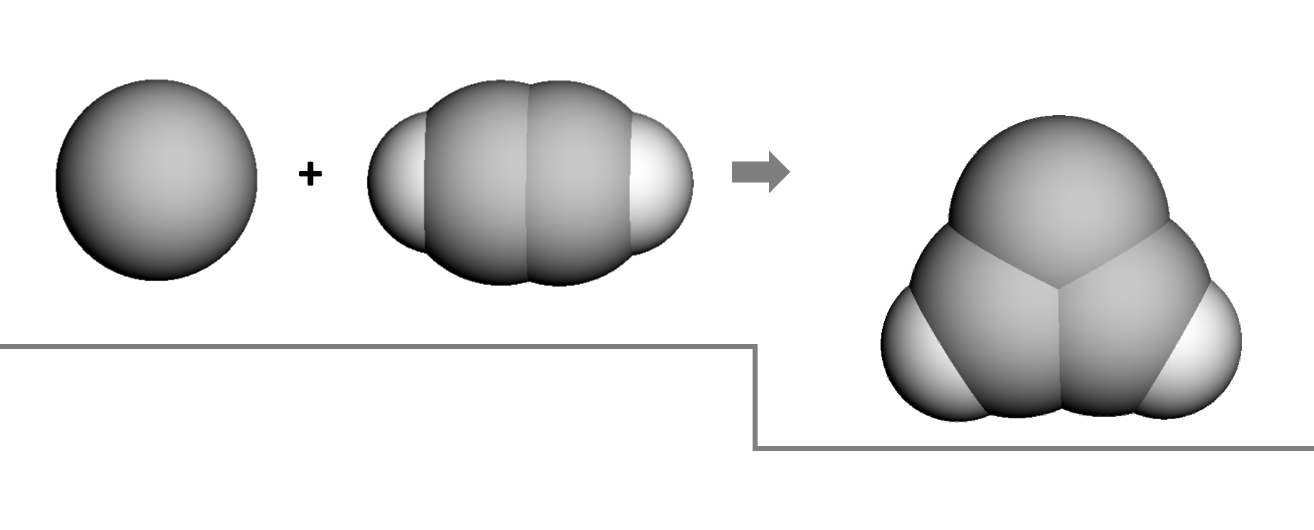

This reaction process is known as a key reaction process as it provides a starting point to a mechanism for the growth of carbon chains. This reaction process occurs with almost zero potential barrier at the room temperature, and it is believed that this reaction also occurs fast in low temperature environments like in interstellar space. **[[17]](https://pubs.acs.org/doi/10.1021/jp020310z)**. This reaction produces $C_3H_2$, the key element which starts carbon chain reactions, and finally resulting in:
$C_3H_2 → H + C_3H$

<a id="final1"></a>

# Final Challenge - Compute Reaction energy of C + C<sub>2</sub>H<sub>2</sub> →C<sub>3</sub>H<sub>2</sub>

We shall now proceed to compute the reaction energy of target process. As we already saw from the noisy simulation run, basic calculations and idealistic ansatz will return a far from reference result and this also translates to a real quantum backend run.

For this challenge, we will provide you a classical quantum chemistry computation reference value as computed by Dr. Yukio Kawashima Sensei.

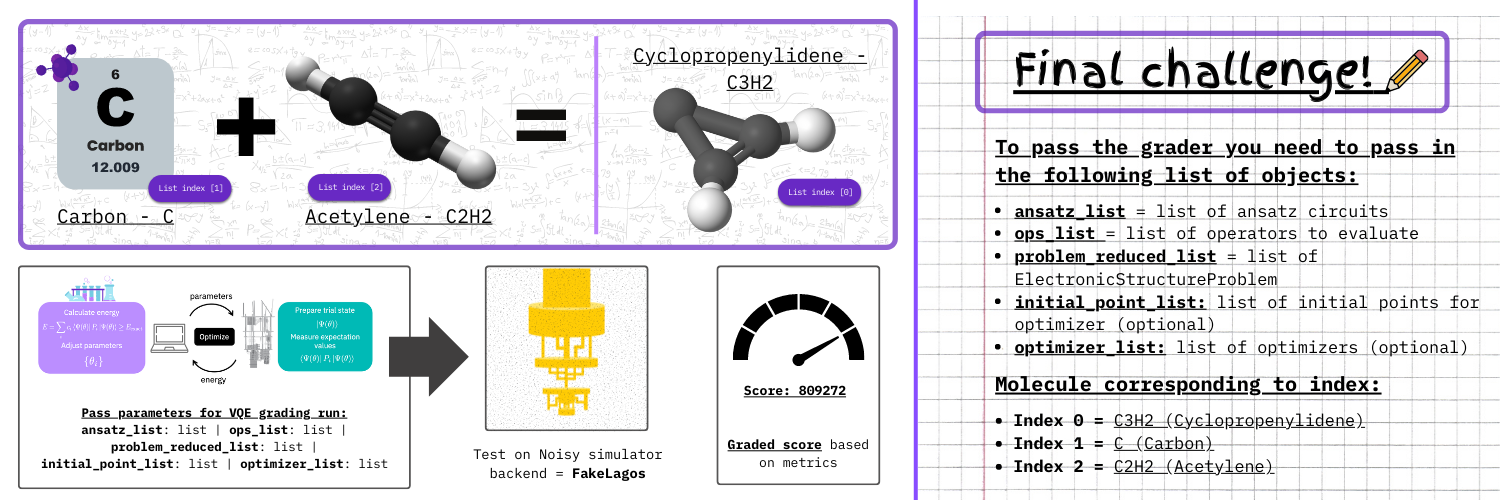

In [ ]:
# Define geometry
carbon = [["C",[0.0,0.0,0.0]]]

# https://webbook.nist.gov/cgi/cbook.cgi?Name=acetylene&Units=SI
acetylene = [["C", [0.0000,    0.0000,   -0.6025]], 
            ["H",[    0.0000,    0.0000,   -1.6691]], 
            ["C",[    0.0000,    0.0000,    0.6025]], 
            ["H",[    0.0000,    0.0000,    1.6691]]]

# https://atct.anl.gov/Thermochemical%20Data/version%201.122/species/?species_number=442
Cyclopropenylidene =  [["C", [2.2883,    0.6993,    0.3468 ]],
           ["C",[    1.9543,    2.0133,    0.7806]],
           ["C",[    1.0108,    0.9522,    0.6802]],
           ["H",[    3.0291,    0.0000,    0.0000]],
           ["H",[    0.0000,    0.5997,    0.7904]]]

<div class="alert alert-block alert-info">
    <b>Note from Sensei: Tips to get a better computation results </b>

You can try to change the basis set (there are many basis sets found here **[[19]](https://www.basissetexchange.org/)**. 
    
Here is a good reference about the basis sets **[[20]](http://vergil.chemistry.gatech.edu/courses/chem6485/pdf/basis-sets.pdf)**. 
    
You can also try different ansatz. Here is an example of another ansatz **[[21]](https://qiskit.org/documentation/stubs/qiskit.circuit.library.EfficientSU2.html)** 
</div>

In [ ]:
# Sample definitions for all 3 molecules for reference. Please feel free to change accordingly if you wish.

# Sample definition Carbon
ansatz_c, ops_c, real_solution_c, problem_reduced_c = construct_problem(geometry=carbon, charge=0, multiplicity=3, basis="ccpvdz", num_electrons=4, num_molecular_orbitals=4)

# Sample definition Acetylene
ansatz_ac, ops_ac, real_solution_ac, problem_reduced_ac = construct_problem(geometry=acetylene, charge=0, multiplicity=1, basis="ccpvdz", num_electrons=4, num_molecular_orbitals=4)

# Sample defininition Cyclopropenylidene
ansatz_cy, ops_cy, real_solution_cy, problem_reduced_cy = construct_problem(geometry=Cyclopropenylidene, charge=0, multiplicity=1, basis="sto3g", num_electrons=2, num_molecular_orbitals=2)

In [ ]:
    ##################
    # YOUR CODE HERE #
    ################## 

<div class="alert alert-block alert-success">
    <b> Notes </b>

- Submit the following for the VQE grading run to run successfully. There will be **3 VQE runs** on a noisy FakeBackend and the calculated result will be scored by the grader  
  - `ansatz_list` = list of ansatz circuits
  - `ops_list` = list of operators to evaluate
  - `problem_reduced_list` = list of ElectronicStructureProblem
  - `initial_point_list`: list of initial points for optimizer (optional, if not passed, will be taken at random)
  - `optimizer_list`: list of optimizers (optional, if not passed will default to `SPSA`)

- The ordered index of the list submited is:
    - **Index 0** - $C_3H_2$ (Cyclopropenylidene)
    - **Index 1** - $C$ (Carbon)
    - **Index 2** - $C_2H_2$ (Acetylene)
    
- The reference value was calculated using a classical computer and is posted below.<br>

- The scoring will depend on **3 factors**:
    - **Depth of ansatz**: Try to build a low score quantum circuit. The circuit score is the sum of the total circuit cost, where the total circuit cost is calculated as below. <br>
    $$circuit\ score = 50 * depth + 10 * (\text{# of CX Gates}) + \text{# of Single Gates} $$

    - **Optimizer score**: Number of optimizer iterations
    - **Reaction Energy**: Closeness of converged value to the computed reaction energy in eV

- **Please feel free to PR and submit your solutions to the challenge repo located here after the challenge: [htps://github.com/qiskit-community/ibm-quantum-challenge-fall-22](https://github.com/qiskit-community/ibm-quantum-challenge-fall-22)**. Please name your notebooks in the following format while submiting a PR to the challenge repo - `Name_Score_Fall22_Lab4.ipynb`


</div>


<div class="alert alert-block alert-info">
    <b>Reference Value</b>
    
    
- Chemistry engine: Pyscf, version 2.0.1
- Python version: 3.9.12
- Computation options used: 
    - method: CCSD
    - basis: cc-pVDZ

    
**Expected Reaction energy: -4.26923078561136 eV**

</div>

In [ ]:
ansatz_list = [ansatz_cy, ansatz_c, ansatz_ac] # List of ansatz circuits
ops_list = [ops_cy, ops_c, ops_ac] # List of operators
problem_reduced_list = [problem_reduced_cy,  problem_reduced_c,  problem_reduced_ac] # List of ElectronicStrucutreProblem

In [ ]:
## Grade and submit your solution
from qc_grader.challenges.fall_2022 import grade_lab4_final

grade_lab4_final_1(ansatz_list, ops_list, problem_reduced_list)
# Optional - grade_lab4_final(ansatz_list, ops_list, problem_reduced_list, initial_point_list, optimizer_list)
# Optional prototype-zne - grade_lab4_final(ansatz_list, ops_list, problem_reduced_list, initial_point_list, optimizer_list, zne_strategy)

<a id="Optional Section"></a>

<div class="alert alert-block alert-info">
    
<b>Optional Section </b>

This is an **optional section** on showcasing how you can explore using and defining a Digital ZNE routine using `prototype-zne`. This section is completely optional and purely for your curiosity with this new module so feel free to explore if you wish to incorporate in your solution and enjoy!
    
</div> 

# Introducing `prototype-zne` module

For your problem you can also leverage Digital ZNE to get your best solution. We shall look how to mitigate errors in your expectation value calculations using a technique known as _Zero noise extrapolation_ (ZNE). This section is adapted from the **[tutorial docs](https://github.com/qiskit-community/prototype-zne/tree/main/docs/tutorials)** in the `prototype-zne` module

This module is built on top the `Estimator` primitive by injecting ZNE capabilities in any given implementation of the `Estimator` primitive. Once this functionality is in place, it can be controlled through a `ZNEStrategy` object that encapsulates all necessary information for customizing the error mitigation process.


## Brief overview of ZNE


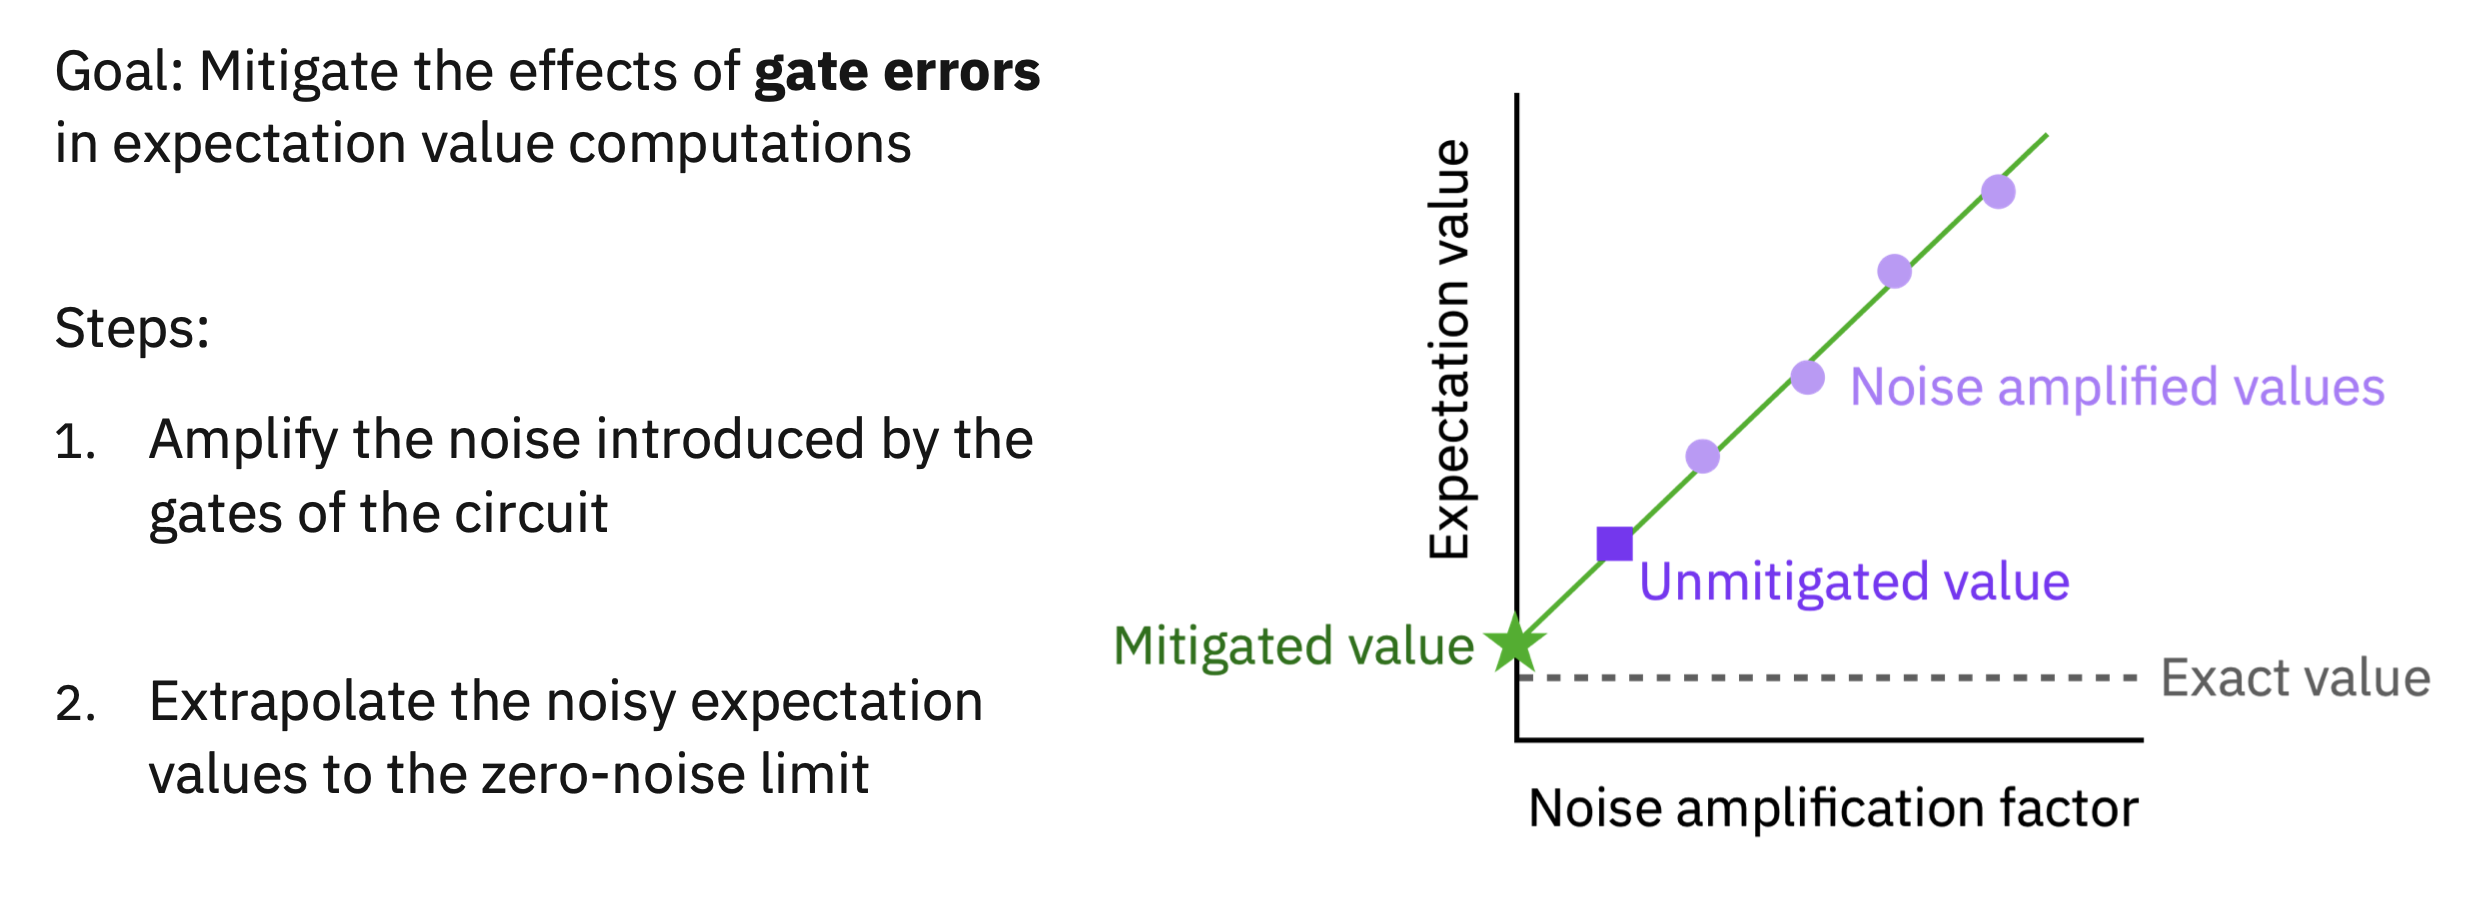

### Noise amplification
The original implementation of ZNE as shown in the paper carried out noise amplification at the hardware level (i.e. _analog_ noise amplification), by modulating the microwave pulses that implement the circuit's unitary gates. This process is significantly involved and requires calibration of the device before each noisy experiment, which is why a more relaxed alternative was devised: gate folding at the gate level rather than the pulse level (i.e. _digital_ noise amplification).


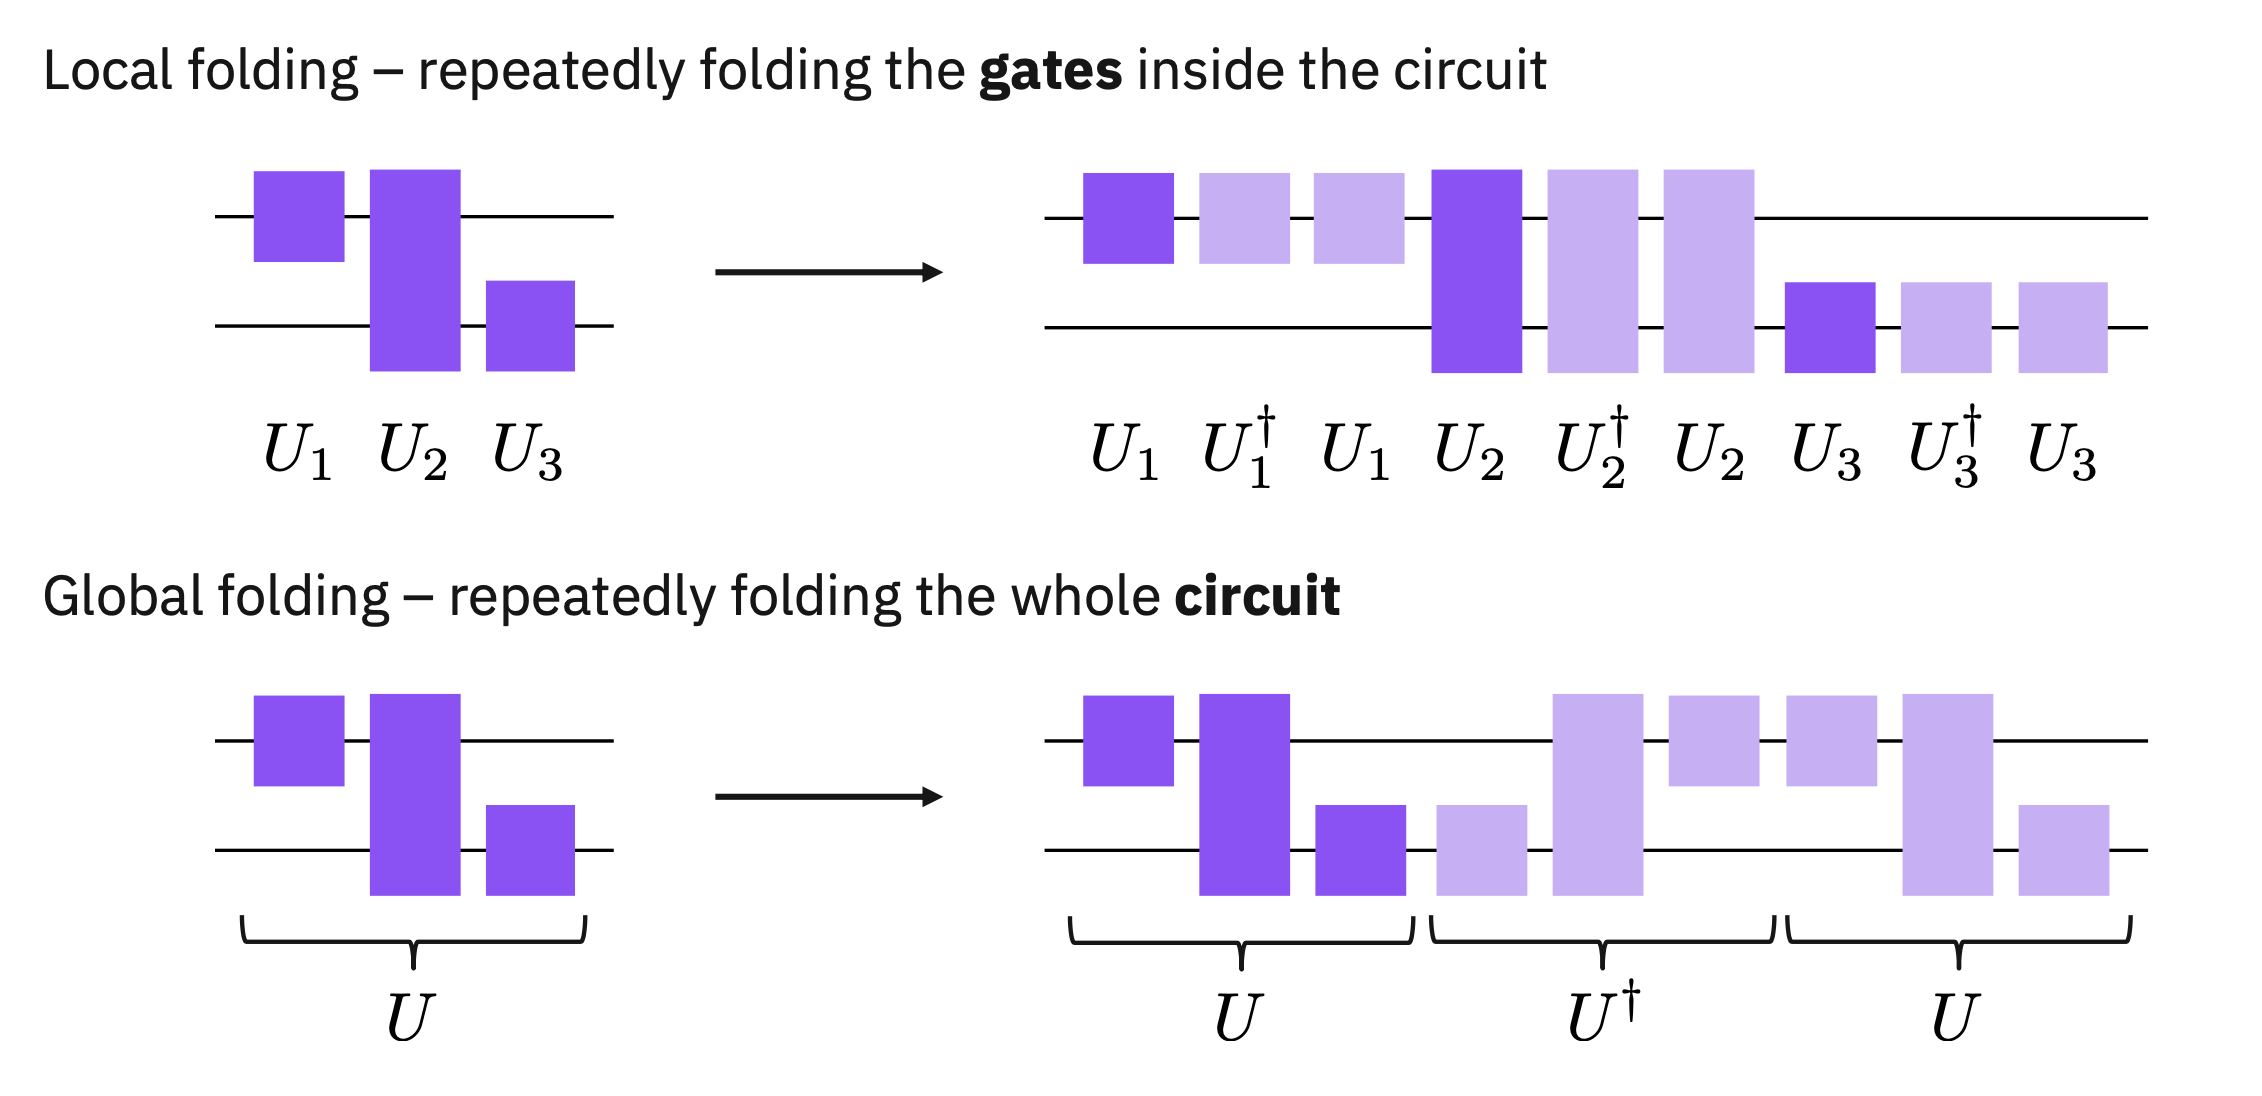


### Extrapolation
This process was first carried out with a technique known as _Richardson extrapolation_. Nonetheless, we often use general regression methods to account for several different noise profiles and extrapolate the result back to get our value of interest


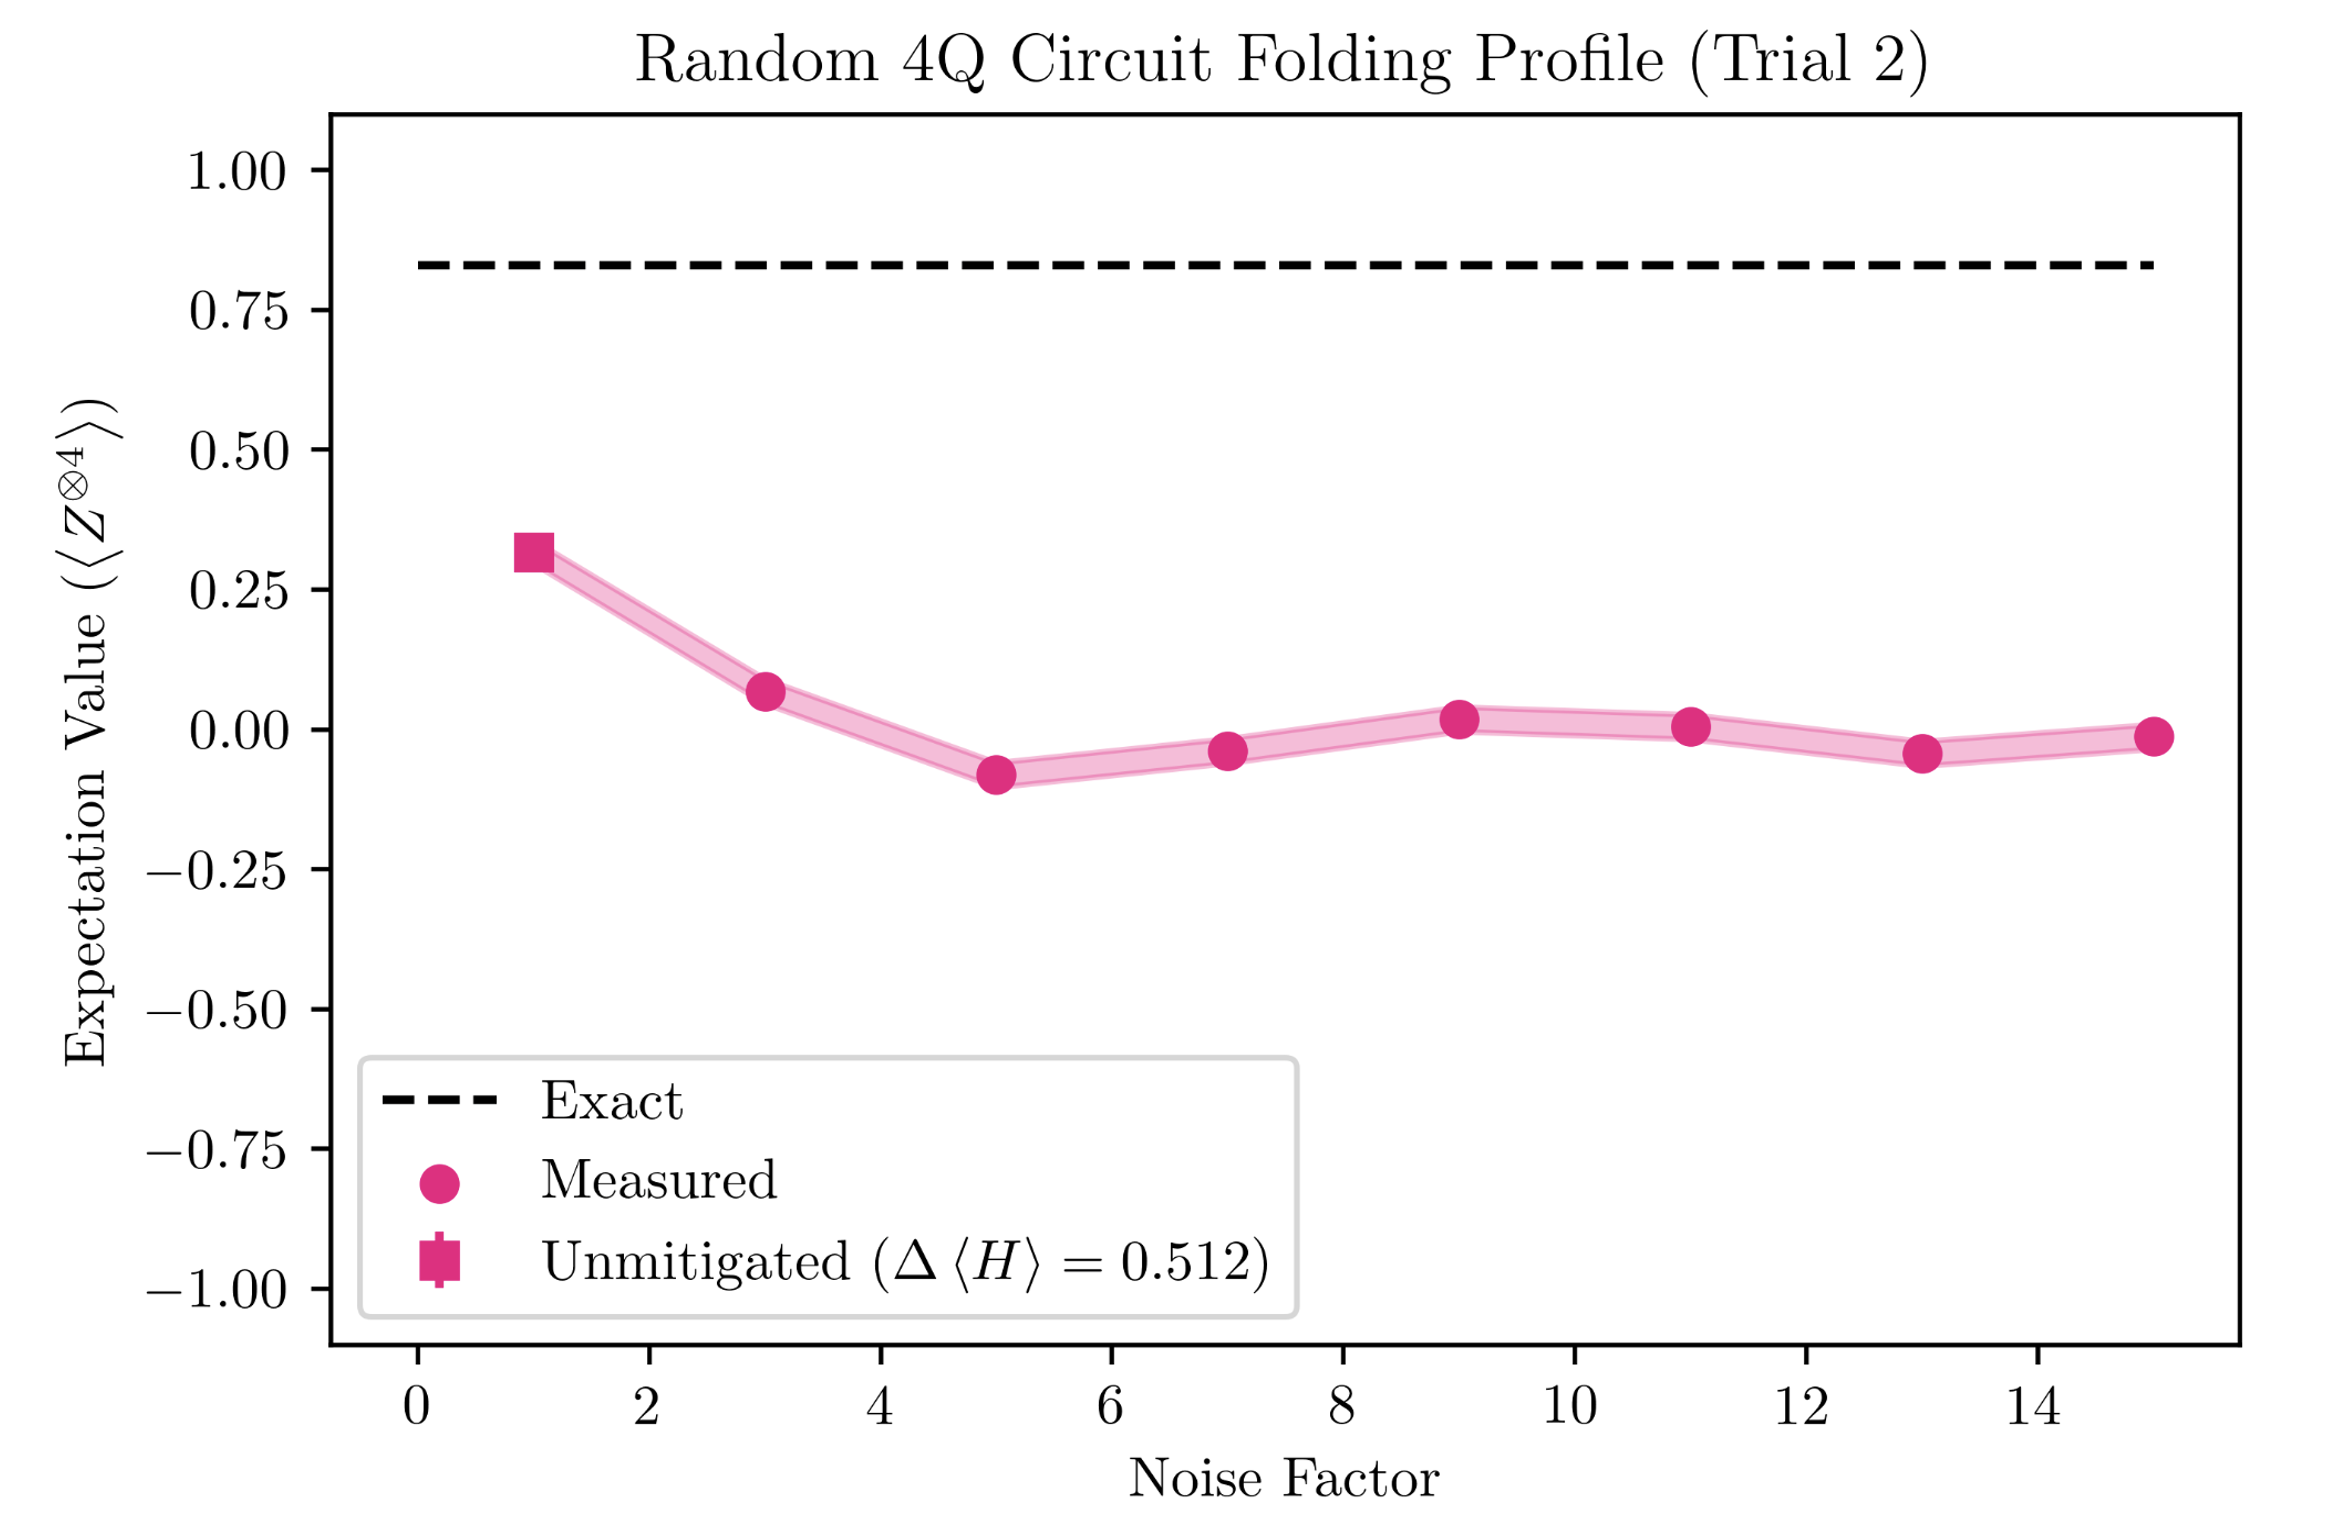

## Building a ZNE Estimator
Since we are going to be showcasing error mitigation, we need our calculations to be noisy. We shall make a new noisy_estimator using the same _FakeBackend_ that we used previously. For this, what call in the `zne()` function and pass in a `BackendEstimator`. This will output another class with the same implementation but with added ZNE capabilities. As with this, you can pass in any `Estimator` class here that implements the `BaseEstimator` interface i.e. all the Estimators in the picture explained in Section 1 are compatible! Since we need to do a noisy simulation here, we shall pass in a `BackendEstimator` class here

In [ ]:
from zne import zne

# Define fake backend
noisy_backend = FakeLagos()

# Define Estimator with the fake backend
ZNEEstimator = zne(BackendEstimator)

## ZNE Strategies

For now, we have the following strategies available which can be used for noist_amplification and extrapolation. These can be applied by defining the `ZNEStrategy` object with the parameters
> - noise_amplifier: A noise amplification strategy implementing the `NoiseAmplifier` interface. Current options: `CXAmplifier`, `LocalFoldingAmplifier`, `GlobalFoldingAmplifier`
> - noise_factors: An list of real valued noise factors that determine by what amount the circuits' noise is amplified.
> - extrapolator: Extrapolation strategies available to be implemented. Current options: `LinearExtrapolator`, `PolynomialExtraploator`
  
You can also specify `transpilation_levels` or `transpiler class` if required. An example to apply a `ZNEStrategy` for our case with is shown below:

In [ ]:
from zne import ZNEStrategy
from zne.extrapolation import PolynomialExtrapolator, LinearExtrapolator
from zne.noise_amplification import LocalFoldingAmplifier, GlobalFoldingAmplifier

# Define Extrapolator
extrapolator = PolynomialExtrapolator(degree=2)
# Define Amplifier
noise_amplifier = LocalFoldingAmplifier(gates_to_fold=2) 

# Define strategy
zne_strategy = ZNEStrategy(
    noise_factors=[1, 3, 5],
    noise_amplifier = noise_amplifier,
    extrapolator=extrapolator
)

Lets apply this `zne_strategy` to a new estimator using the `ZNEEstimator` class we defined above!

In [ ]:
# Apply strategy to ZNE Estimator
noisy_estimator_zne = ZNEEstimator(backend=noisy_backend, zne_strategy=zne_strategy)

## Lets see how it fares!
This run will apply the strategies and give us some results. **Do note this may take time to run even on simulators due to the nature of operation, so feel free to stretch your legs and take a walk while this is computed.** Estimated time run depends on the size of the ansatz and strategy and can go upto 40-50minutes for bigger ansatz and heavier strategies!

In [ ]:
%%time
# Noisy Estimator run
algorithm_globals.random_seed = 1024

Energy_H_m_noisy_zne,_,_ = custom_vqe(estimator=noisy_estimator_zne, ansatz=ansatz_m, ops=ops_m, problem_reduced=problem_reduced_m)

In [ ]:
# The following plot compares the two Estimators - with and without noise

plt.rcParams["font.size"] = 14

# plot loss and reference value
plt.figure(figsize=(12, 6), facecolor='white')
plt.plot(Energy_H_m, label="Estimator VQE H2 IDEAL")
plt.plot(Energy_H_m_noisy, label="Estimator VQE H2 with noise")
plt.plot(Energy_H_m_noisy_zne, label="Estimator VQE H2 Noise + ZNE mitigated")
plt.axhline(y=real_solution_m.real, color="tab:red", ls="--", label="Target")

plt.legend(loc="best")
plt.xlabel("Iteration")
plt.ylabel("Energy [H]")
plt.title("VQE energy")
plt.show()

## Still not good?

Indeed here we see is a classic convergence problem which could be due to a variety of factors and for this noisy run, the predominant one can be the depth of the ansatz. 

This is where you can experiment with for your open ended challenge above and for the right ansatz and right strategies you can see the results are quite promising. The `prototype-zne` module has very basic amplification and extrapolation strategies here but what is enables you is the power to define your own extrapolation and amplification strategies and apply it to any `Estimator` object which is something that can be really useful.

For instance, you can take a look at this result that was done for a different ansatz and a different strategy applied.



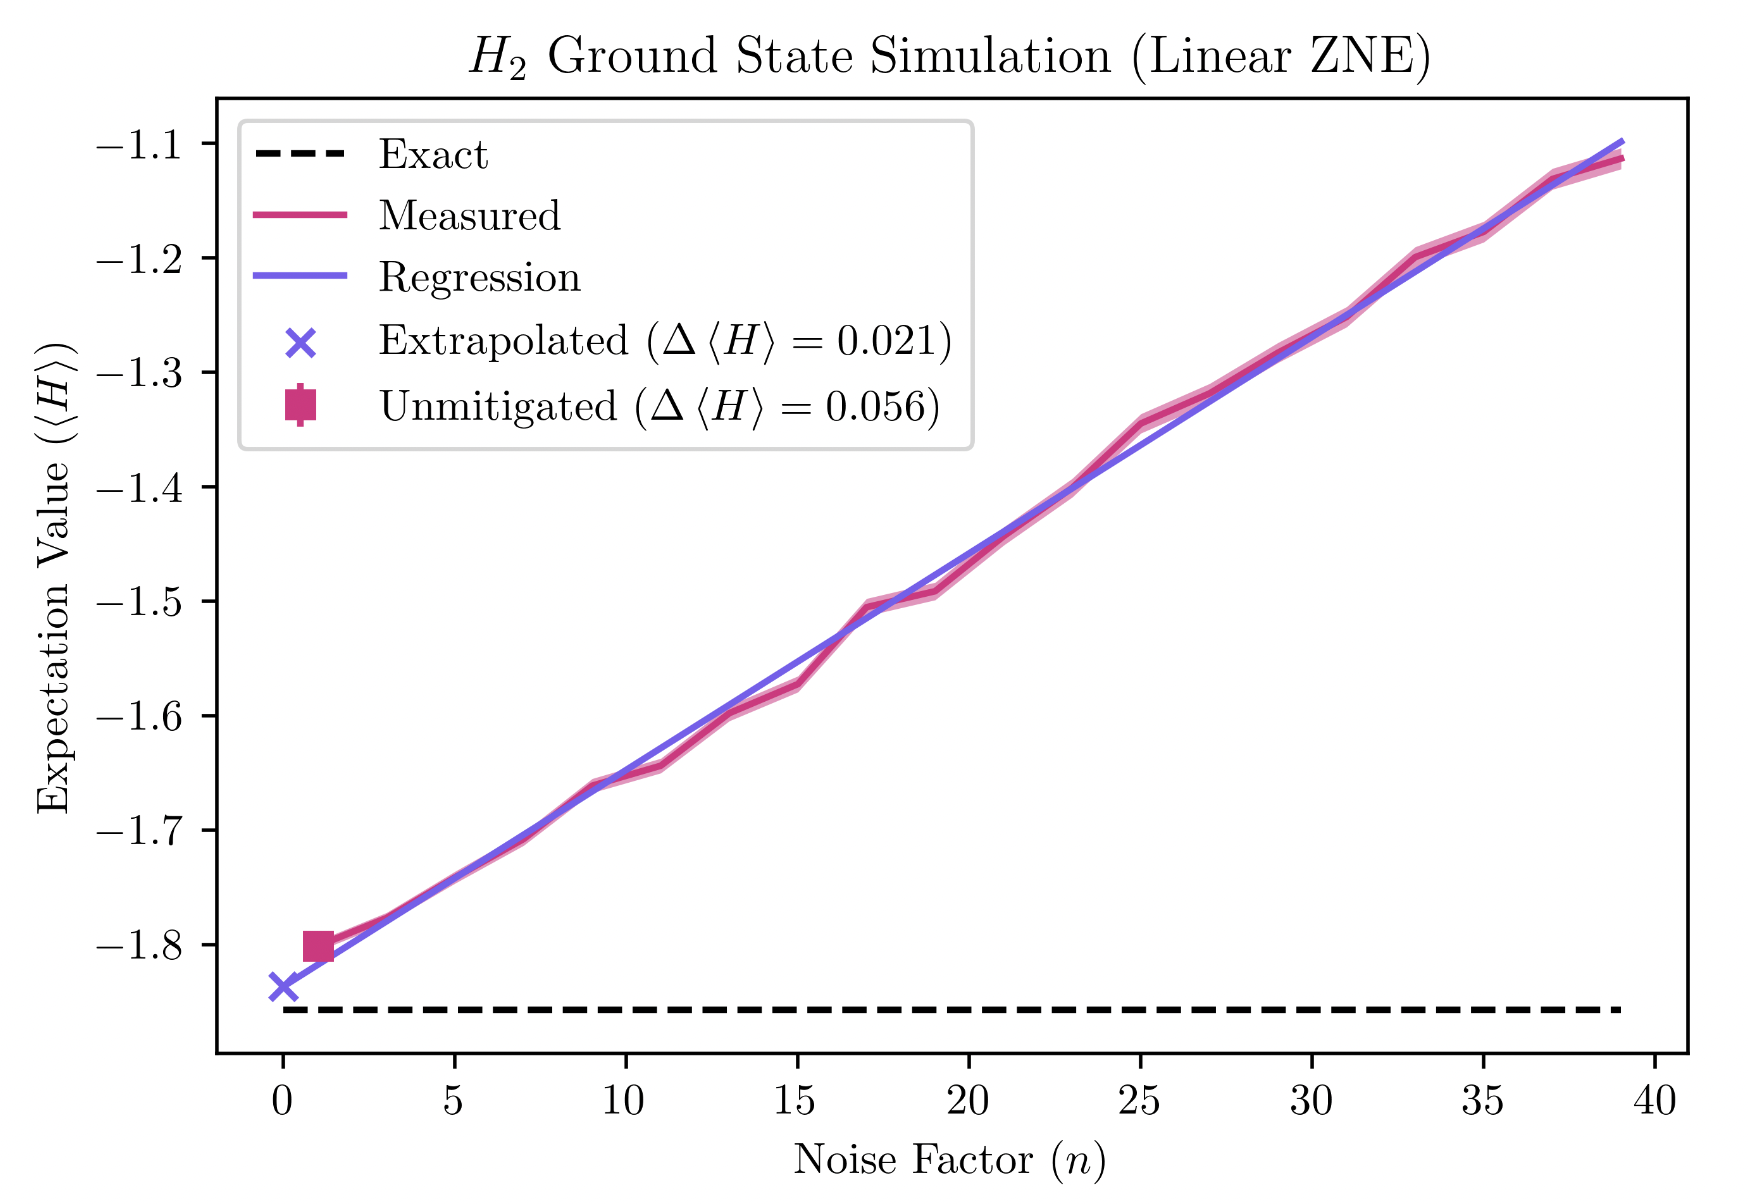

## Custom ZNE strategies

Feel free to go ahead and make the best strategy for the problem! The current implementation of `ZneEstimator` allows us build custom noise amplification, and extrapolation techniques as custom classes which can be imported and called by the library:

In [ ]:
from zne.extrapolation import Extrapolator
from zne.noise_amplification import CircuitNoiseAmplifier


############################  NOISE AMPLIFIER  ############################
class CustomAmplifier(CircuitNoiseAmplifier):
    def amplify_circuit_noise(self, circuit, noise_factor):
        return circuit.copy()  # Dummy, nonperforming


############################  EXTRAPOLATOR  ############################
class CustomExtrapolator(Extrapolator):
    @property
    def min_points(self):
        return 2
    
    def _fit_regression_model(self, data):
        prediction = 1.0
        variance = 0.0
        model = lambda target: (prediction, variance)
        return model, {"metadata": None}  # Dummy, nonperforming

We can then proceed to provide these custom built classes during instantiation through a `ZNEStrategy` object:

In [ ]:
zne_strategy = ZNEStrategy(
    noise_amplifier=CustomAmplifier(),
    noise_factors=(1, 3),
    extrapolator=CustomExtrapolator(),
)

estimator = ZNEEstimator(backend=Backend(), zne_strategy=zne_strategy)

**Think you can make the next best zne amplifier or extrapolation strategy?** ;) Feel free to give it a go and implement it in the final problem above to get a better result for the noisy simulation! 

# References
- [1] **[Physics of the Interstellar Medium Lecture Notes: Interstellar Molecules](https://www.astronomy.ohio-state.edu/pogge.1/Ast871/Notes/Molecules.pdf)**
- [2] **[Chemistry and Dynamics in the Interstellar Medium](https://pubs.rsc.org/en/content/chapterhtml/2017/bk9781782627760-00001?isbn=978-1-78262-776-0)**
- [3] **[Interstellar chemistry](https://www.pnas.org/doi/full/10.1073/pnas.0605352103)**
- [4] **[Interstellar $H_3^+$](https://www.pnas.org/doi/10.1073/pnas.0601242103)**
- [5] **[Spectroscopic properties of interstellar molecules: Theory and experiment](https://pubs.rsc.org/en/content/articlelanding/2003/CP/b303753n)**
- [6] **[Cyclopropenylidene (Wikipedia)](https://en.wikipedia.org/wiki/Cyclopropenylidene)**
- [7] **[$H_3^+$: the initiator of interstellar chemistry](https://www.cambridge.org/core/journals/international-journal-of-astrobiology/article/abs/h3-the-initiator-of-interstellar-chemistry/69C0753DDB337E4475416CB6FA3D802D)**
- [8] **[The interstellar chemistry of $C_3H$ and $C_3H_2$ isomers]( https://arxiv.org/ftp/arxiv/papers/1707/1707.07926.pdf)**
- [9] **[PubChem](https://pubchem.ncbi.nlm.nih.gov/)**
- [10] **[NIST Chemistry WebBook, SRD 69](https://webbook.nist.gov/chemistry/form-ser/)**
- [11] **[$H_3^+$: Ab initio calculation of the vibration spectrum](https://aip.scitation.org/doi/abs/10.1063/1.433585)**
- [12] **[Quantum algorithms for electronic structure calculations: particle/hole Hamiltonian and optimized wavefunction expansions](https://arxiv.org/abs/1805.04340)**
- [13] **[A survey of cyclopropenylidene (C3H2) in galactic sources](https://pubmed.ncbi.nlm.nih.gov/11542419/)**
- [14] **[Cyclopropenylidene properties provided by NIST Chemistry WebBook, SRD 69](https://webbook.nist.gov/cgi/cbook.cgi?ID=C16165405&Units=CAL&Mask=3FFF)**
- [15] **[The B 1B1 State of Cyclopropenylidene, c-C3H2](https://pubs.acs.org/doi/10.1021/jz900114r)**
- [16] **[The dipole moment of $C_3H_2$](https://academic.oup.com/mnras/article/227/1/19P/1066005)**
- [17] **[C + C2H2: A Key Reaction in Interstellar Chemistry](https://pubs.acs.org/doi/10.1021/jp020310z)**
- [18] **[Variational Quantum Computation of Excited States](https://arxiv.org/abs/1805.08138)**

# Additional information

<b>Created by:</b> Desiree Vogt-Lee, Sophy Shin, Vishal Bajpe, Yuri Kobayashi

<b>Advisor:</b> Yukio Kawashima, Pedro Rivero

<b>Creative assets by:</b> Radha Pyari Sandhir

<b>IBM Open Science Prize</b>  
Congratulations on making it all the way to the end of The IBM Quantum Challenge Fall 2022! If you’re looking to apply your new-found knowledge further, we encourage you to participate in the IBM Open Science Prize that will be announced later this year. Every year, a new technical challenge at the forefront of quantum computing is posed to the entire world and those who generate the strongest solutions win thousands of dollars in prizes! We hope to see you there!


Version: 1.0

In [137]:
from qiskit.tools.jupyter import *
%qiskit_version_table